# Credit Analysis
    a.	Preprocess and clean if necessary.
    b.	Build a model predicting “Risk”. 
    c.	Remember to comment your code and give rationales for models, algorithms, and approaches. 


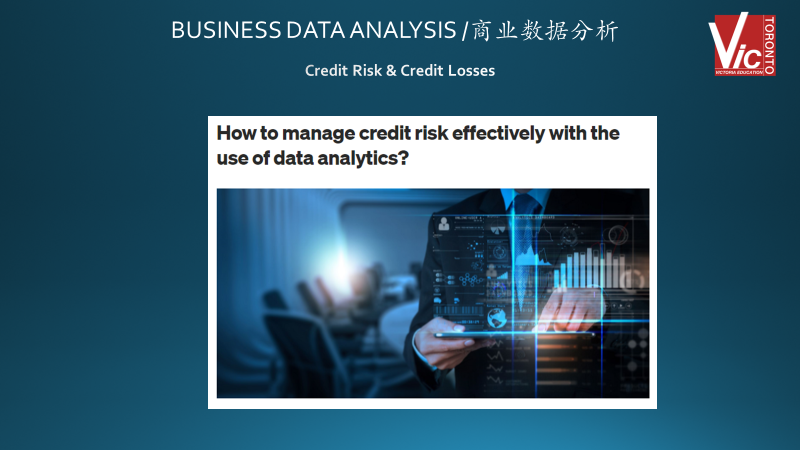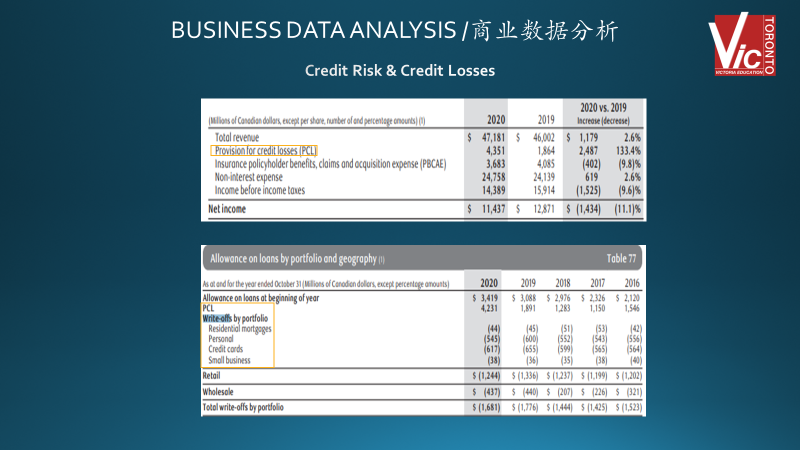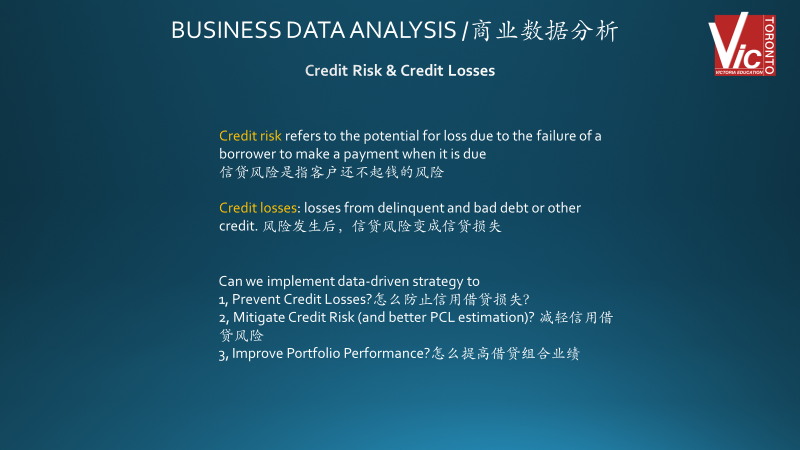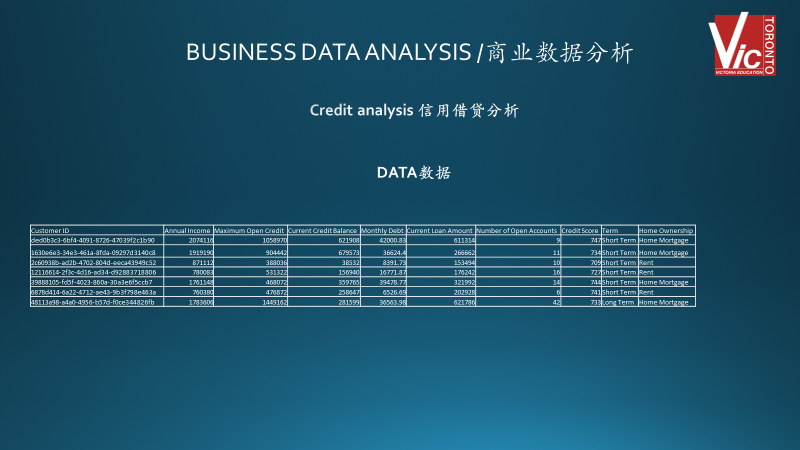

## Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline

## Load data

In [2]:
import pyodbc
import urllib
import sqlalchemy


'''connect to datahub'''

params_datahub = urllib.parse.quote_plus("DRIVER={SQL Server Native Client 11.0};"
                                 "SERVER=localhost\SQLEXPRESS;"
                                 "DATABASE=datahub;"
                                 "UID=sa;"
                                 "PWD=user1")

engine_datahub = sqlalchemy.create_engine("mssql+pyodbc:///?odbc_connect={}".format(params_datahub))

In [3]:
# df=pd.read_csv(r"C:\Business_Data_Analysis\data\credit_train.csv")
df=pd.read_sql_table(r"credit_train",engine_datahub)
df.head()

Loan ID                           Customer ID  \
0  14dd8831-6af5-400b-83ec-68e61888a048  981165ec-3274-42f5-a3b4-d104041a9ca9   
1  4771cc26-131a-45db-b5aa-537ea4ba5342  2de017a3-2e01-49cb-a581-08169e83be29   
2  4eed4e6a-aa2f-4c91-8651-ce984ee8fb26  5efb2b2b-bf11-4dfd-a572-3761a2694725   
3  77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a  e777faab-98ae-45af-9a86-7ce5b33b1011   
4  d4062e70-befa-4995-8643-a0de73938182  81536ad9-5ccf-4eb8-befb-47a4d608658e   

  Loan Status  Current Loan Amount        Term  Credit Score  Annual Income  \
0  Fully Paid             445412.0  Short Term         709.0      1167493.0   
1  Fully Paid             262328.0  Short Term           NaN            NaN   
2  Fully Paid           99999999.0  Short Term         741.0      2231892.0   
3  Fully Paid             347666.0   Long Term         721.0       806949.0   
4  Fully Paid             176220.0  Short Term           NaN            NaN   

  Years in current job Home Ownership             Purpose  Monthly Debt  \
0              8 years  Home Mortgage   Home Improvements       5214.74   
1            10+ years  Home Mortgage  Debt Consolidation      33295.98   
2              8 years       Own Home  Debt Consolidation      29200.53   
3              3 years       Own Home  Debt Consolidation       8741.90   
4              5 years           Rent  Debt Consolidation      20639.70   

   Years of Credit History  Months since last delinquent  \
0                     17.2                           NaN   
1                     21.1                           8.0   
2                     14.9                          29.0   
3                     12.0                           NaN   
4                      6.1                           NaN   

   Number of Open Accounts  Number of Credit Problems  Current Credit Balance  \
0                      6.0                        1.0                228190.0   
1                     35.0                        0.0                229976.0   
2                     18.0                        1.0                297996.0   
3                      9.0                        0.0                256329.0   
4                     15.0                        0.0                253460.0   

   Maximum Open Credit  Bankruptcies  Tax Liens  
0             416746.0           1.0        0.0  
1             850784.0           0.0        0.0  
2             750090.0           0.0        0.0  
3             386958.0           0.0        0.0  
4             427174.0           0.0        0.0

In [4]:
df['Loan Status'].unique()
# df['Years in current job'].unique()

array(['Fully Paid', 'Charged Off', None], dtype=object)

## Exploratory Data Analysis(EDA)



### Check missing values and shape
Normally we need to clean the samples, i,e, impute missing values but in this case the data is pretty clean with no missing values. We also check the shape to make sure it matches the meta data info in the document. 

In [5]:
df.info(), df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

(None, (100514, 19))

In [6]:
df.shape

(100514, 19)

### Check Loan Status ratio
The samples are balanced so we can use "Accuracy" metric to measure the performance of the model

<AxesSubplot:>

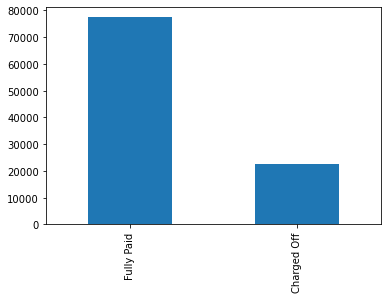

In [7]:
df['Loan Status'].value_counts().plot(kind='bar')

### Describe the data

Categorical features/Dimensions 

In [8]:
cat_cols=df.select_dtypes(object).drop(['Loan ID','Customer ID'],axis=1).columns.tolist()
cat_cols

['Loan Status', 'Term', 'Years in current job', 'Home Ownership', 'Purpose']

<AxesSubplot:>

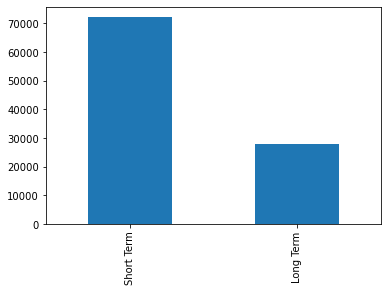

In [9]:
df['Term'].value_counts().plot(kind="bar")


In [10]:
# x = ('apple', 'banana', 'cherry')
# y = enumerate(x)

# for item in y:
#     print(item)

In [11]:
import matplotlib.pyplot as plt
categorical_features = cat_cols
# fig, ax = plt.subplots(1, len(categorical_features))
# fig, ax = plt.subplots(1, len(categorical_features))
for i, categorical_feature in enumerate(df[categorical_features]):
    print(i,categorical_feature)

0 Loan Status
1 Term
2 Years in current job
3 Home Ownership
4 Purpose


C:\Users\bdaon\AppData\Local\Temp/ipykernel_17852/323911355.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


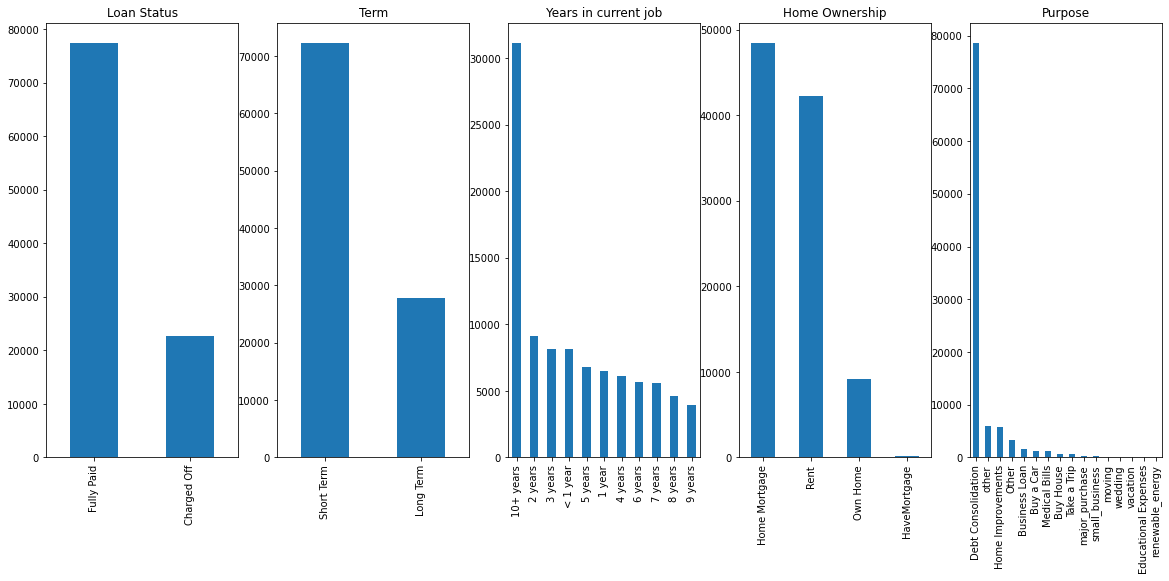

In [12]:
import matplotlib.pyplot as plt
categorical_features = cat_cols
# fig, ax = plt.subplots(1, len(categorical_features))
fig, ax = plt.subplots(1, len(categorical_features))
for i, categorical_feature in enumerate(df[categorical_features]):
    df[categorical_feature].value_counts().plot(kind="bar", ax=ax[i],figsize=(20,8),rot=90,fontsize=10).set_title(categorical_feature)
fig.show()

Numeric data

#### Histogram
Histogram groups numeric data into bins, displaying the bins as segmented columns and summarize the distribution of a univariate data set. 

In [13]:
num_cols=df.select_dtypes('number').columns.tolist()
num_cols

['Current Loan Amount',
 'Credit Score',
 'Annual Income',
 'Monthly Debt',
 'Years of Credit History',
 'Months since last delinquent',
 'Number of Open Accounts',
 'Number of Credit Problems',
 'Current Credit Balance',
 'Maximum Open Credit',
 'Bankruptcies',
 'Tax Liens']

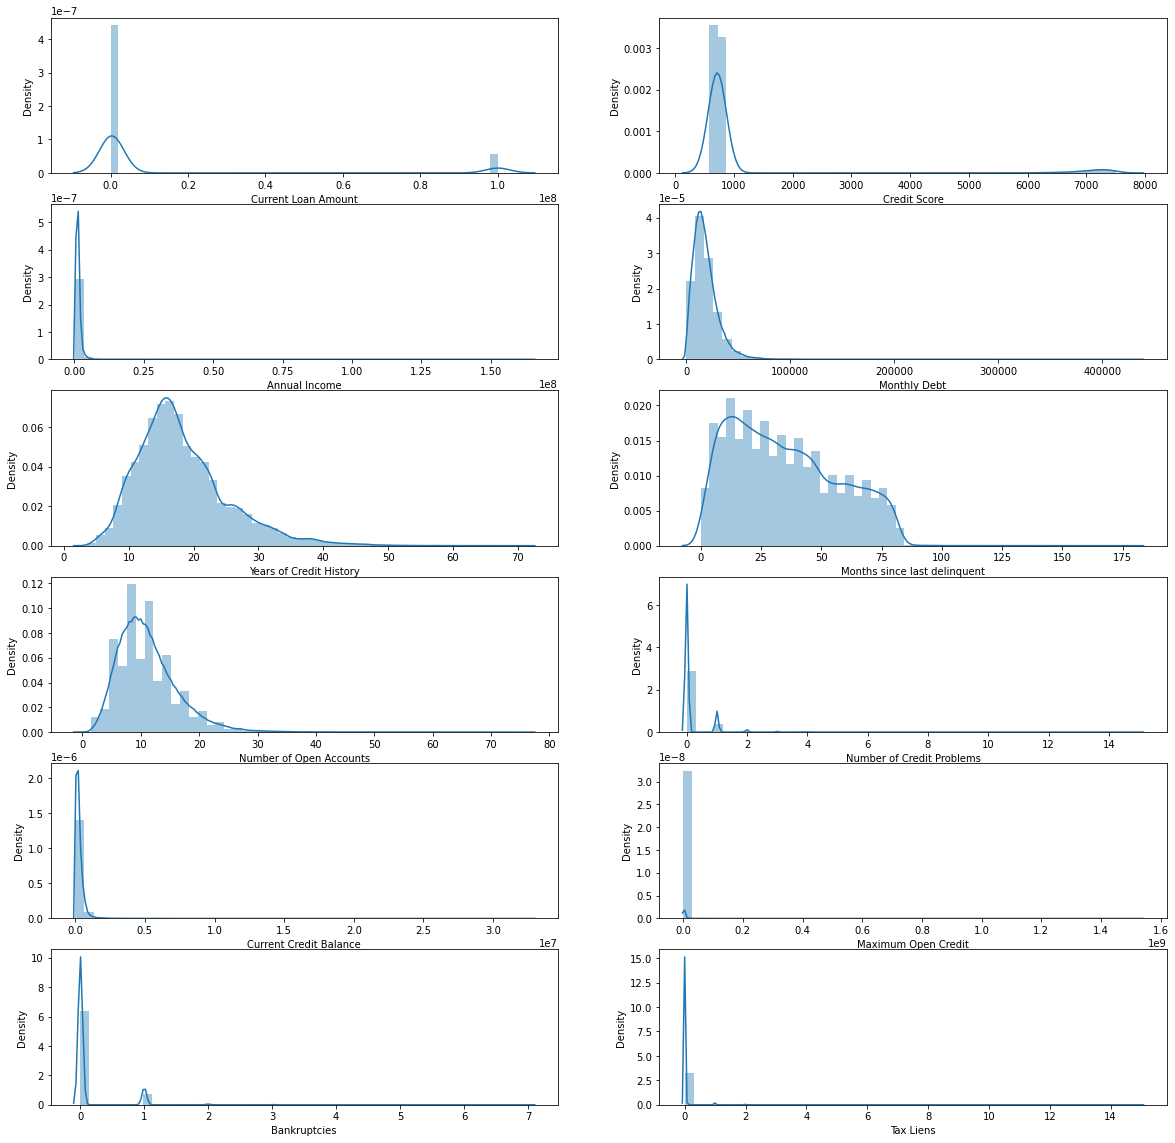

In [14]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
fig, ax = plt.subplots(6, 2, figsize=(20, 20))

for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        sns.distplot(df[df[num_cols].columns[i*2+j]], ax=ax[i][j],bins=50)

Boxplot : 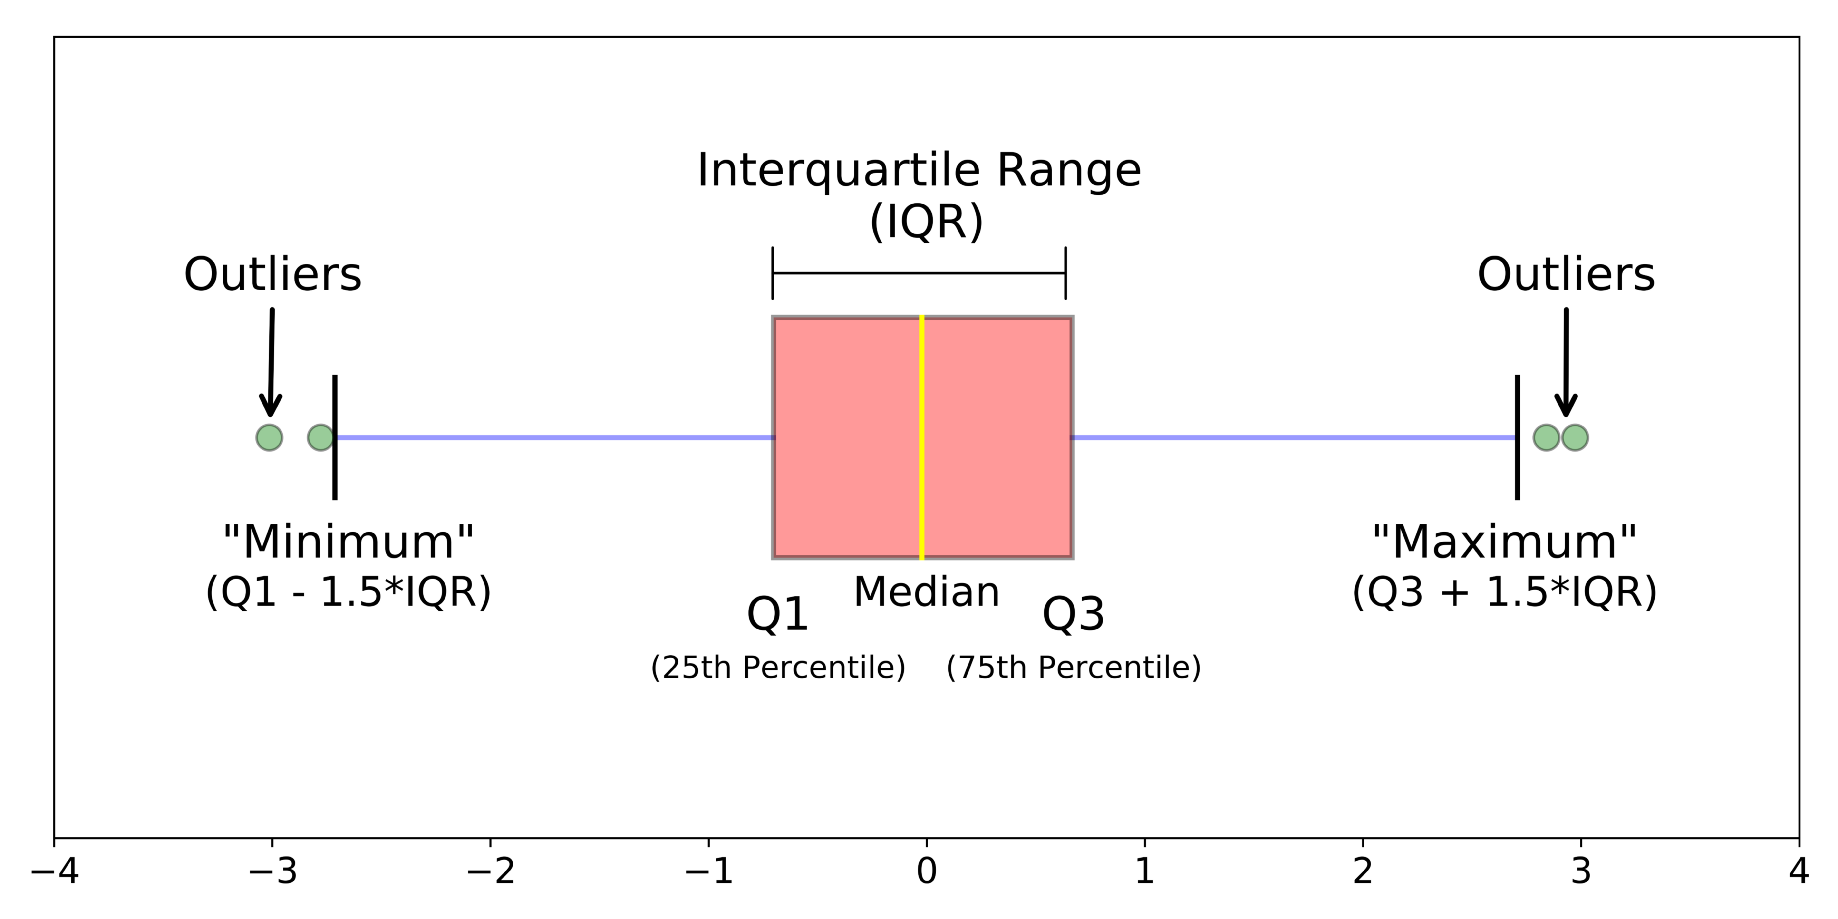

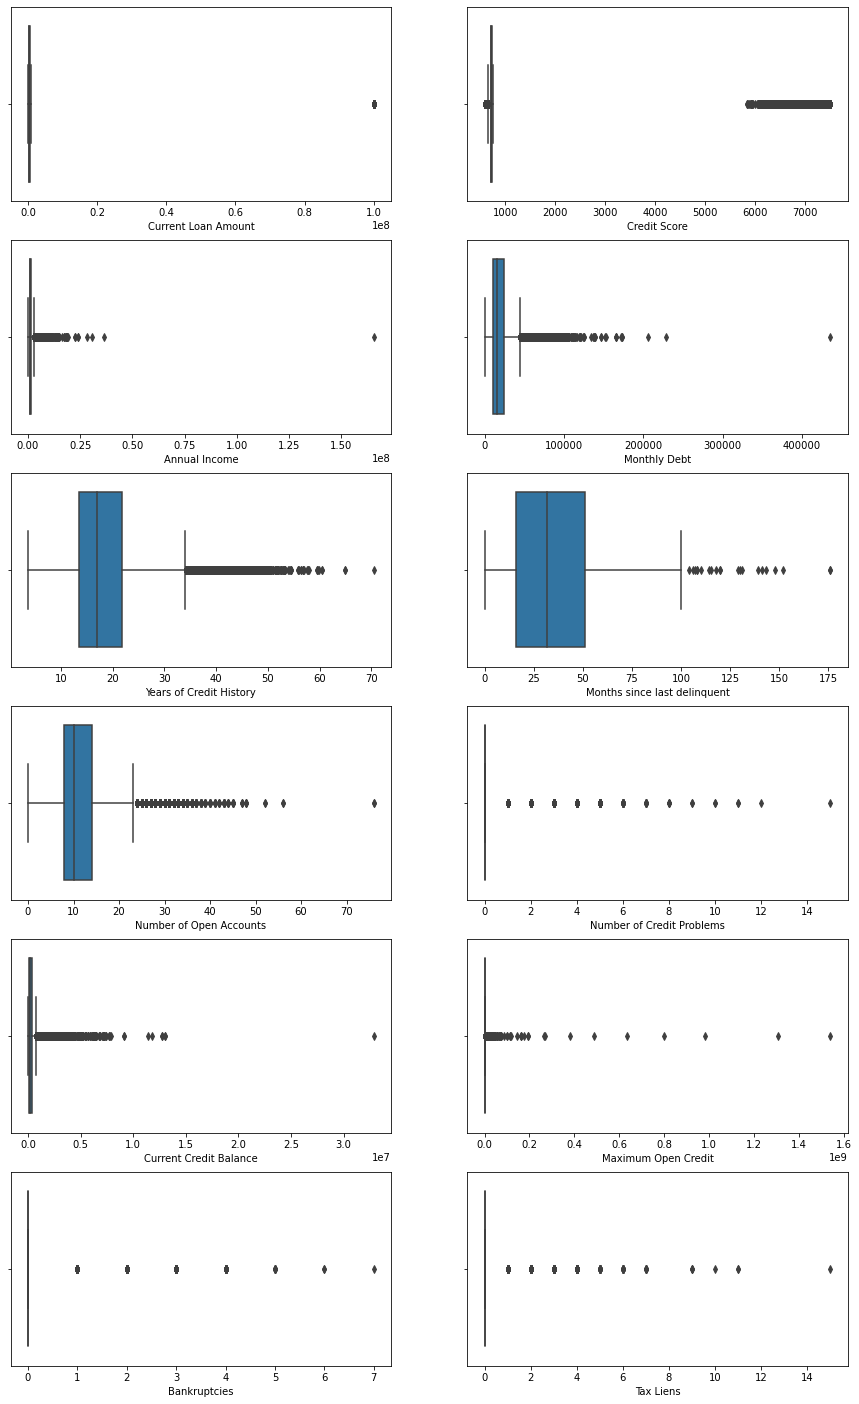

In [15]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

fig, ax = plt.subplots(6, 2, figsize=(15, 25))

#plot the features except LOCATION_ID and Risk
for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
#         sns.boxplot(df[df[num_cols].columns[i*2+j]], ax=ax[i][j],orient='v',showfliers=False)
        sns.boxplot(df[df[num_cols].columns[i*2+j]], ax=ax[i][j],orient='v')

In [16]:
df.describe()
# from the "max" row we can see feature PARA_A, PARA_B,Money_Value,History have some potential outliers. 

Current Loan Amount  Credit Score  Annual Income   Monthly Debt  \
count         1.000000e+05  80846.000000   8.084600e+04  100000.000000   
mean          1.176045e+07   1076.456089   1.378277e+06   18472.412336   
std           3.178394e+07   1475.403791   1.081360e+06   12174.992609   
min           1.080200e+04    585.000000   7.662700e+04       0.000000   
25%           1.796520e+05    705.000000   8.488440e+05   10214.162500   
50%           3.122460e+05    724.000000   1.174162e+06   16220.300000   
75%           5.249420e+05    741.000000   1.650663e+06   24012.057500   
max           1.000000e+08   7510.000000   1.655574e+08  435843.280000   

       Years of Credit History  Months since last delinquent  \
count            100000.000000                  46859.000000   
mean                 18.199141                     34.901321   
std                   7.015324                     21.997829   
min                   3.600000                      0.000000   
25%                  13.500000                     16.000000   
50%                  16.900000                     32.000000   
75%                  21.700000                     51.000000   
max                  70.500000                    176.000000   

       Number of Open Accounts  Number of Credit Problems  \
count             100000.00000              100000.000000   
mean                  11.12853                   0.168310   
std                    5.00987                   0.482705   
min                    0.00000                   0.000000   
25%                    8.00000                   0.000000   
50%                   10.00000                   0.000000   
75%                   14.00000                   0.000000   
max                   76.00000                  15.000000   

       Current Credit Balance  Maximum Open Credit  Bankruptcies     Tax Liens  
count            1.000000e+05         9.999800e+04  99796.000000  99990.000000  
mean             2.946374e+05         7.607984e+05      0.117740      0.029313  
std              3.761709e+05         8.384503e+06      0.351424      0.258182  
min              0.000000e+00         0.000000e+00      0.000000      0.000000  
25%              1.126700e+05         2.734380e+05      0.000000      0.000000  
50%              2.098170e+05         4.678740e+05      0.000000      0.000000  
75%              3.679588e+05         7.829580e+05      0.000000      0.000000  
max              3.287897e+07         1.539738e+09      7.000000     15.000000

In [17]:
df['Credit Score']=np.where(df['Credit Score']>=1000,df['Credit Score']/10,df['Credit Score'])

In [18]:
df['Current Loan Amount']=np.where(df['Current Loan Amount']==99999999,df['Current Loan Amount'].median(),df['Current Loan Amount'])

In [19]:
df.describe()

Current Loan Amount  Credit Score  Annual Income   Monthly Debt  \
count        100000.000000  80846.000000   8.084600e+04  100000.000000   
mean         312305.834940    716.293447   1.378277e+06   18472.412336   
std          175240.815085     28.297164   1.081360e+06   12174.992609   
min           10802.000000    585.000000   7.662700e+04       0.000000   
25%          179652.000000    703.000000   8.488440e+05   10214.162500   
50%          312246.000000    722.000000   1.174162e+06   16220.300000   
75%          402292.000000    738.000000   1.650663e+06   24012.057500   
max          789250.000000    751.000000   1.655574e+08  435843.280000   

       Years of Credit History  Months since last delinquent  \
count            100000.000000                  46859.000000   
mean                 18.199141                     34.901321   
std                   7.015324                     21.997829   
min                   3.600000                      0.000000   
25%                  13.500000                     16.000000   
50%                  16.900000                     32.000000   
75%                  21.700000                     51.000000   
max                  70.500000                    176.000000   

       Number of Open Accounts  Number of Credit Problems  \
count             100000.00000              100000.000000   
mean                  11.12853                   0.168310   
std                    5.00987                   0.482705   
min                    0.00000                   0.000000   
25%                    8.00000                   0.000000   
50%                   10.00000                   0.000000   
75%                   14.00000                   0.000000   
max                   76.00000                  15.000000   

       Current Credit Balance  Maximum Open Credit  Bankruptcies     Tax Liens  
count            1.000000e+05         9.999800e+04  99796.000000  99990.000000  
mean             2.946374e+05         7.607984e+05      0.117740      0.029313  
std              3.761709e+05         8.384503e+06      0.351424      0.258182  
min              0.000000e+00         0.000000e+00      0.000000      0.000000  
25%              1.126700e+05         2.734380e+05      0.000000      0.000000  
50%              2.098170e+05         4.678740e+05      0.000000      0.000000  
75%              3.679588e+05         7.829580e+05      0.000000      0.000000  
max              3.287897e+07         1.539738e+09      7.000000     15.000000

### Clip, i.e. assigns values outside boundary to boundary values, the data to deal with outliers. 
 Outliers may distort how we see the data. They contain information too so it's a tradeoff; we lose some info but gain a better big picture of the data.

In [20]:
df['Years in current job']=df['Years in current job'].str[:2].replace({'< ':'0.5'}).astype(float)

In [21]:
# here we use quantile 0.01 as lower limit and 0.99 upper.
df[num_cols]=df[num_cols].clip(lower=df[num_cols].quantile(0.01), upper=df[num_cols].quantile(0.99),axis=1)
df.describe()

Current Loan Amount  Credit Score  Annual Income  Years in current job  \
count        100000.000000  80846.000000   8.084600e+04          95778.000000   
mean         312347.348280    716.421926   1.356195e+06              5.934975   
std          174940.776601     27.766647   7.485277e+05              3.563923   
min           37861.780000    621.000000   3.458637e+05              0.500000   
25%          179652.000000    703.000000   8.488440e+05              3.000000   
50%          312246.000000    722.000000   1.174162e+06              6.000000   
75%          402292.000000    738.000000   1.650663e+06             10.000000   
max          778404.000000    750.000000   4.586904e+06             10.000000   

        Monthly Debt  Years of Credit History  Months since last delinquent  \
count  100000.000000            100000.000000                  46859.000000   
mean    18328.885249                18.164207                     34.874987   
std     11372.300056                 6.835628                     21.896521   
min      1249.816200                 6.400000                      1.000000   
25%     10214.162500                13.500000                     16.000000   
50%     16220.300000                16.900000                     32.000000   
75%     24012.057500                21.700000                     51.000000   
max     58741.374700                40.100000                     81.000000   

       Number of Open Accounts  Number of Credit Problems  \
count            100000.000000              100000.000000   
mean                 11.095860                   0.158530   
std                   4.841969                   0.413715   
min                   3.000000                   0.000000   
25%                   8.000000                   0.000000   
50%                  10.000000                   0.000000   
75%                  14.000000                   0.000000   
max                  27.000000                   2.000000   

       Current Credit Balance  Maximum Open Credit  Bankruptcies     Tax Liens  
count            1.000000e+05         9.999800e+04  99796.000000  99990.000000  
mean             2.830483e+05         6.251740e+05      0.110445      0.019282  
std              2.596546e+05         5.653909e+05      0.313446      0.137515  
min              2.831000e+03         2.642068e+04      0.000000      0.000000  
25%              1.126700e+05         2.734380e+05      0.000000      0.000000  
50%              2.098170e+05         4.678740e+05      0.000000      0.000000  
75%              3.679588e+05         7.829580e+05      0.000000      0.000000  
max              1.552585e+06         3.615757e+06      1.000000      1.000000

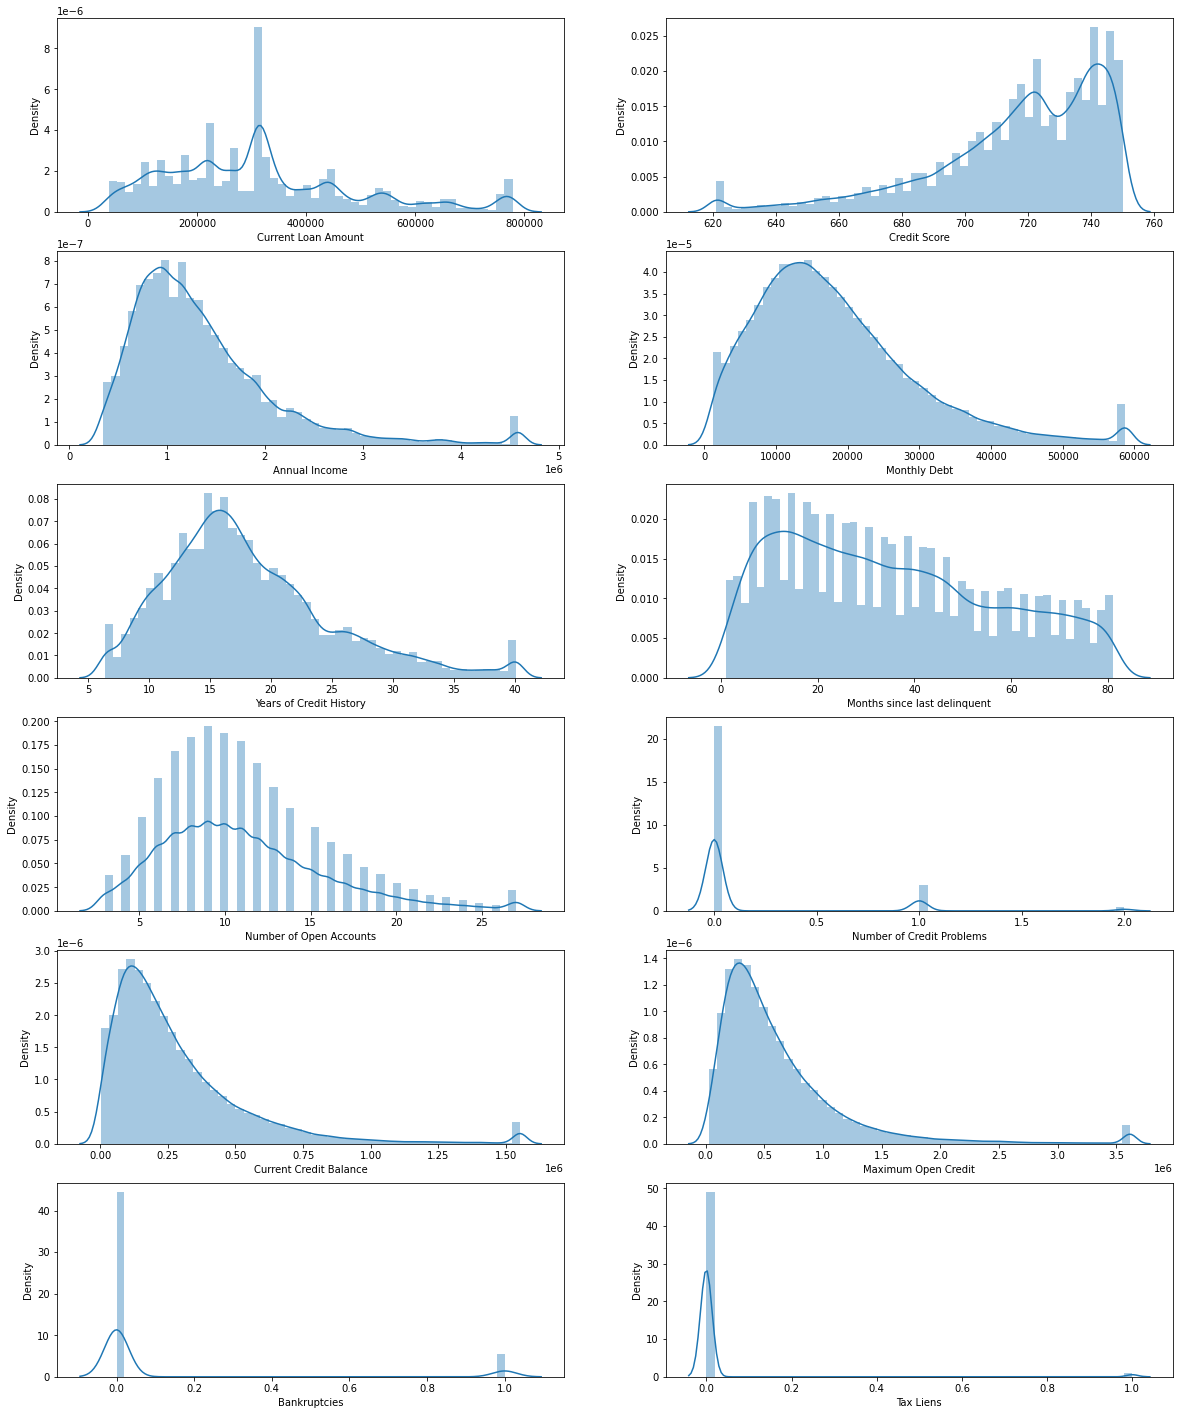

In [22]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
fig, ax = plt.subplots(6, 2, figsize=(20, 25))

for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        sns.distplot(df[df[num_cols].columns[i*2+j]], ax=ax[i][j],bins=50)

### Boxplot the data
Boxplot shows the shape of the distribution, its central value, and its variability

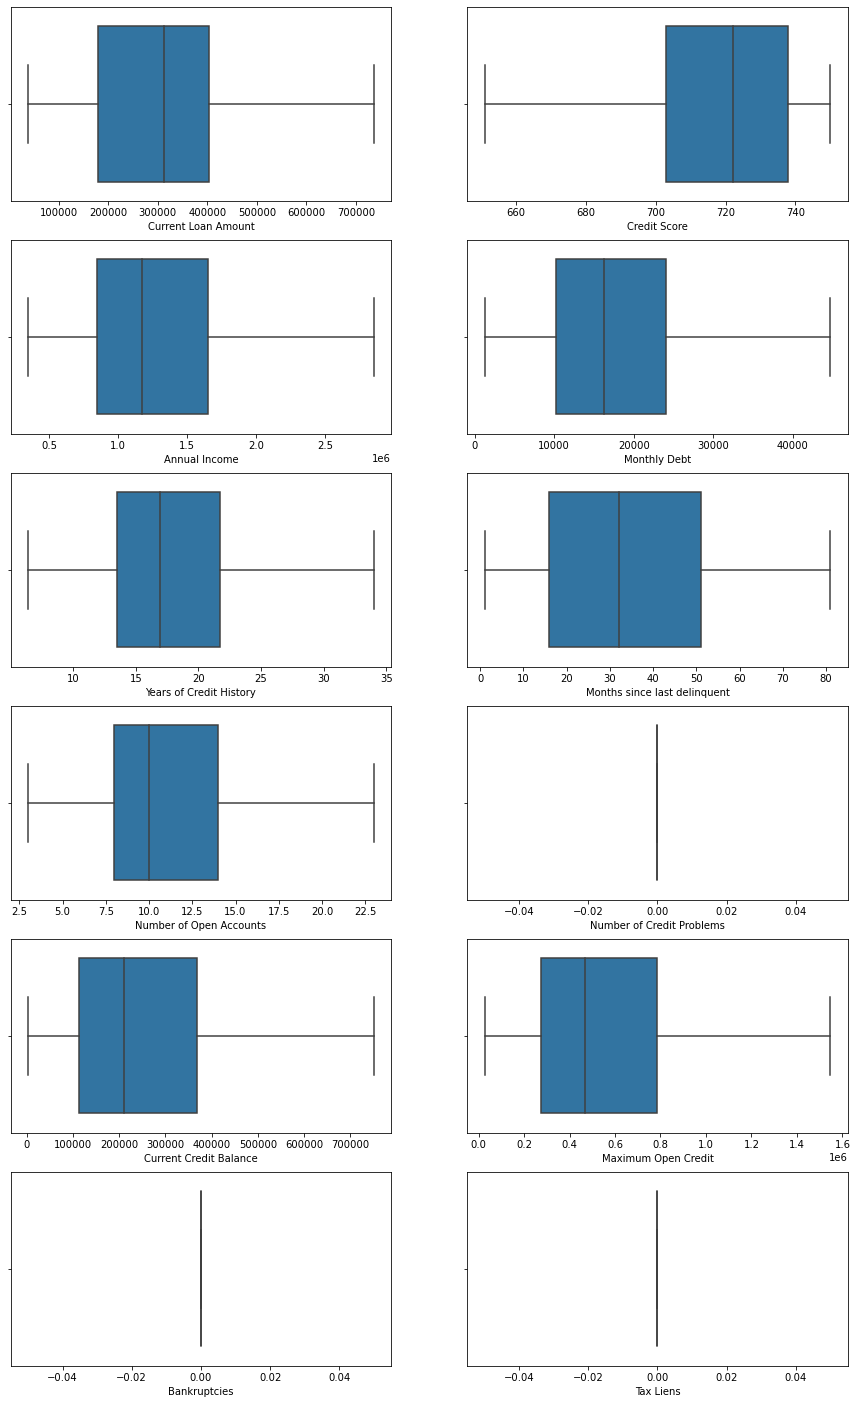

In [23]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

fig, ax = plt.subplots(6, 2, figsize=(15, 25))

#plot the features except LOCATION_ID and Risk
for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        sns.boxplot(df[df[num_cols].columns[i*2+j]], ax=ax[i][j],orient='v',showfliers=False)

#### Explain the Boxplots:
The boxplots tell similar story as the Histograms. None of the distributions seem normal.

### Correlation heatmap
Correlation heatmap allows us to see relations between features/attributes. The higher the absolute coefficient, the stronger the correlation is. 

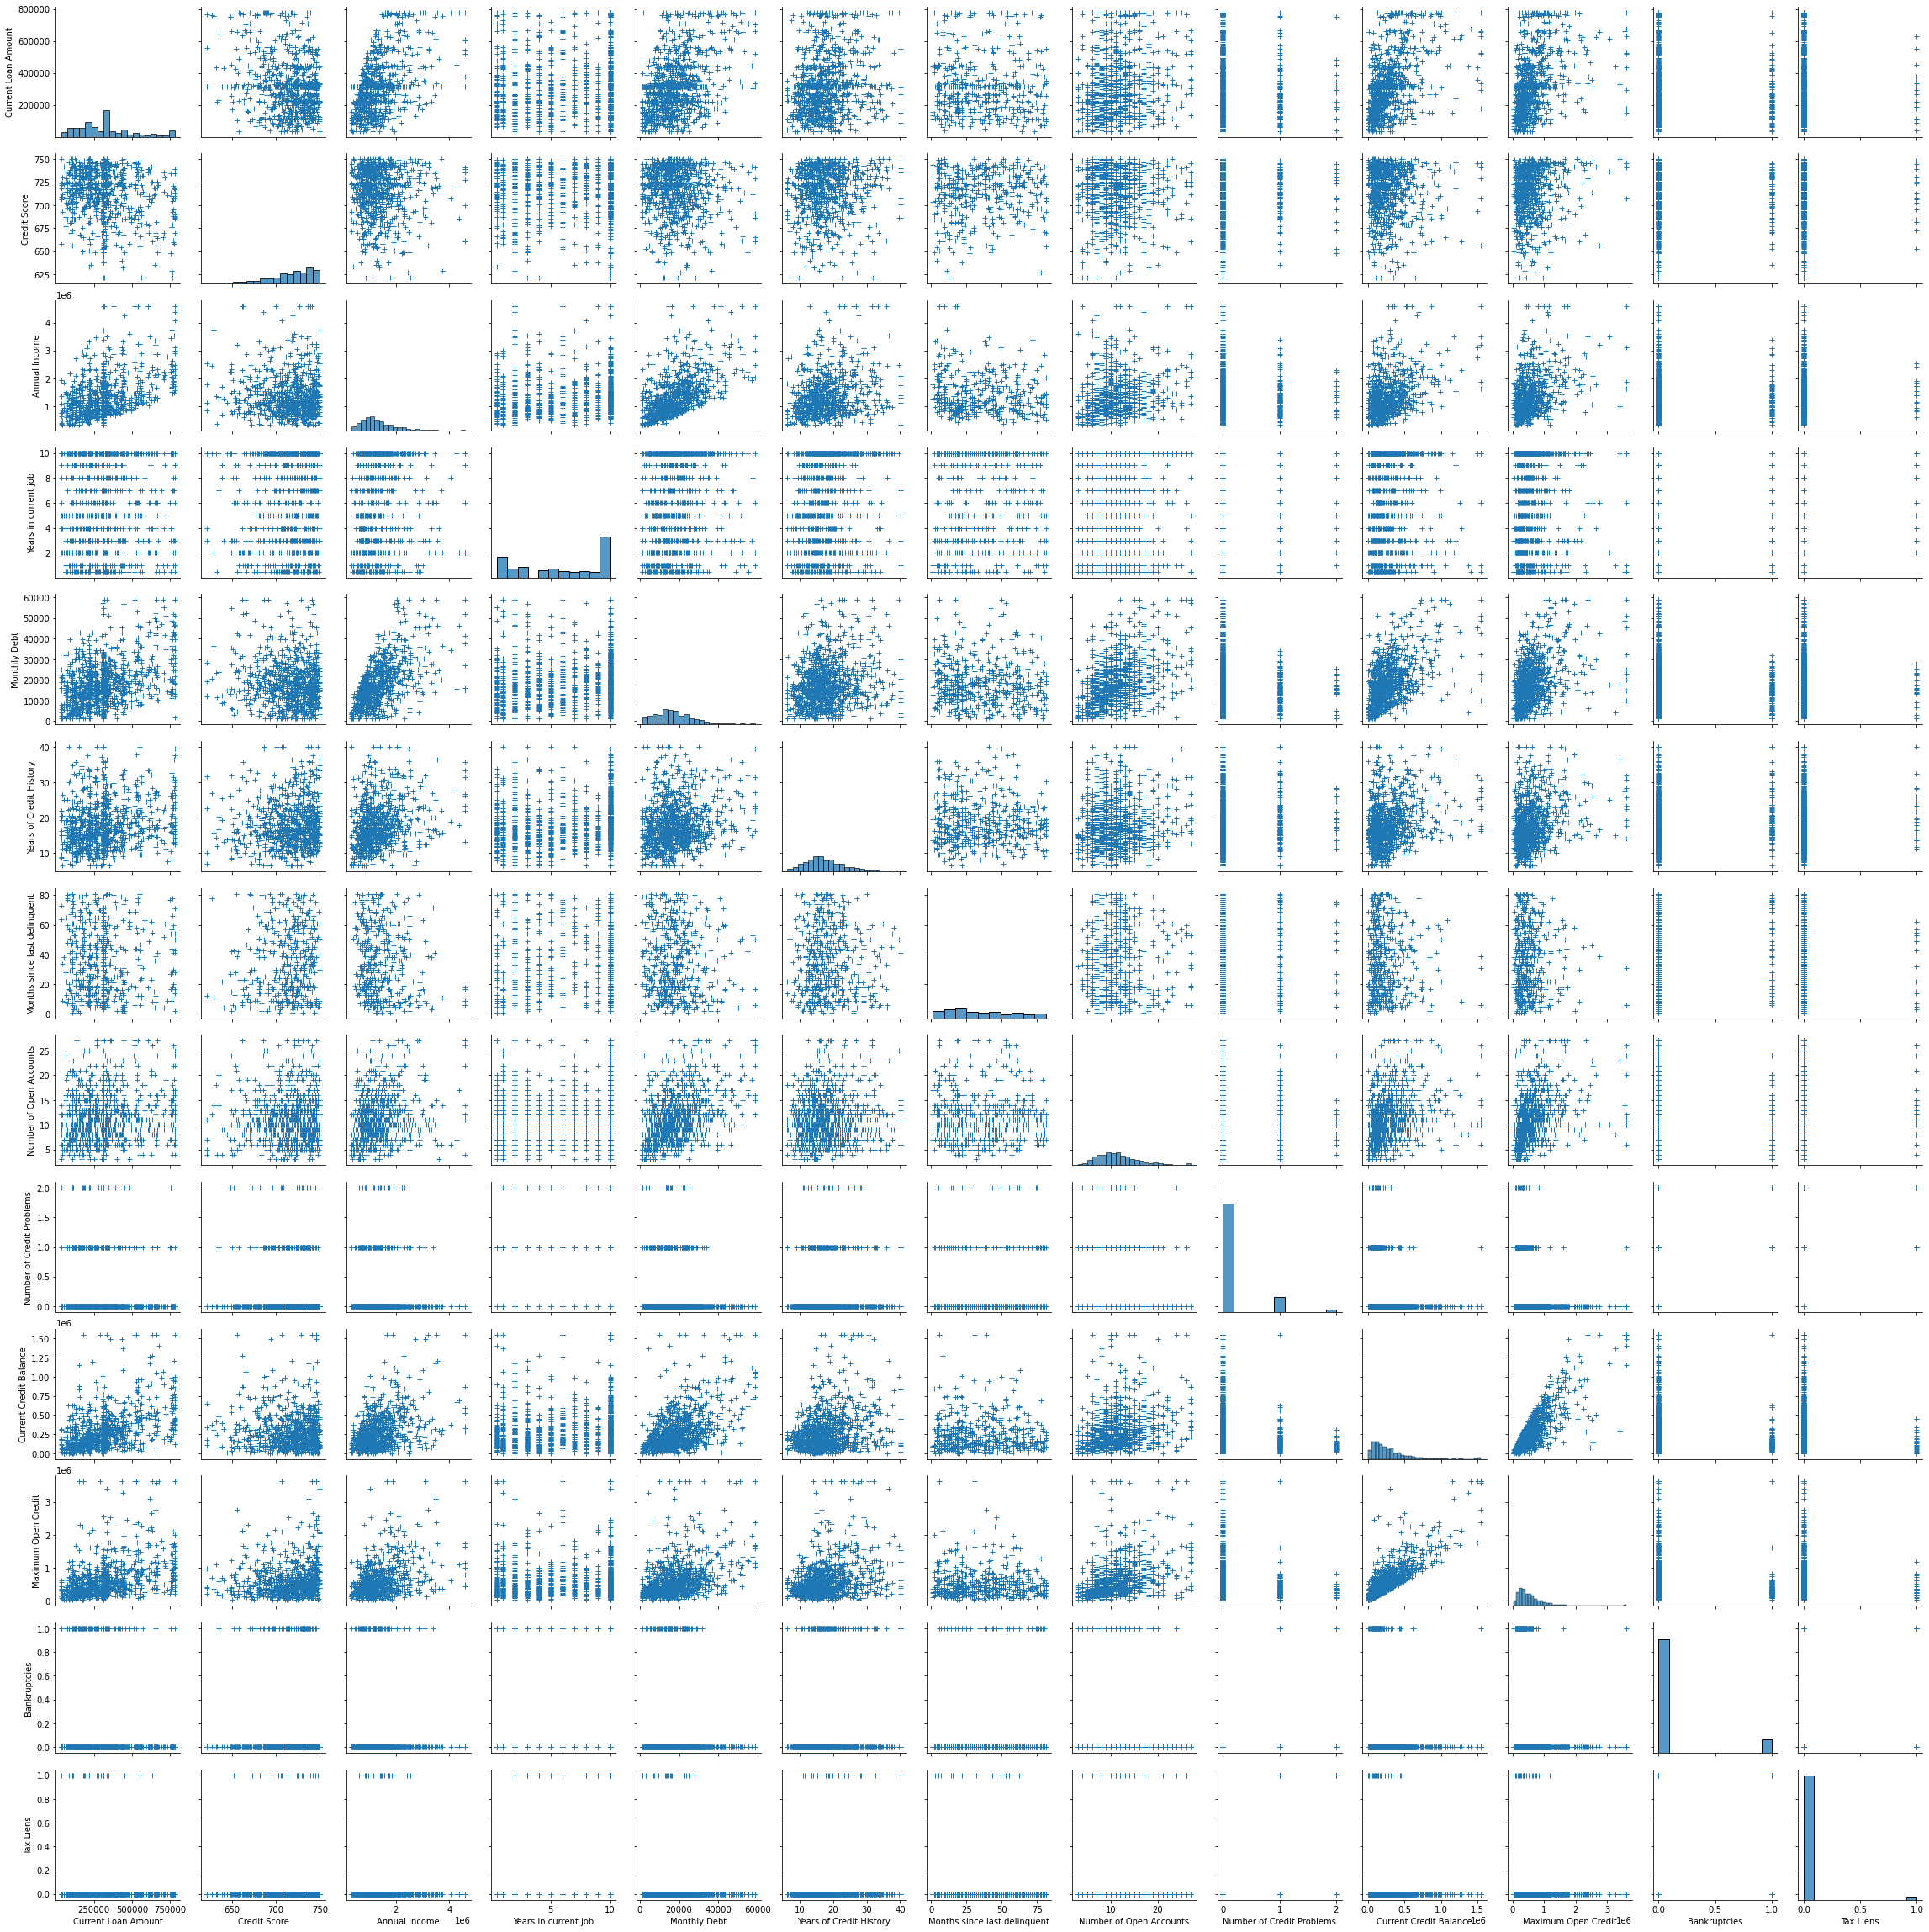

In [24]:
import seaborn as sns
df=df.query('`Loan ID`.notnull()', engine='python')
sns.pairplot(df.sample(frac=0.01, replace=True).reset_index(drop=True),plot_kws=dict(marker="+", linewidth=1))

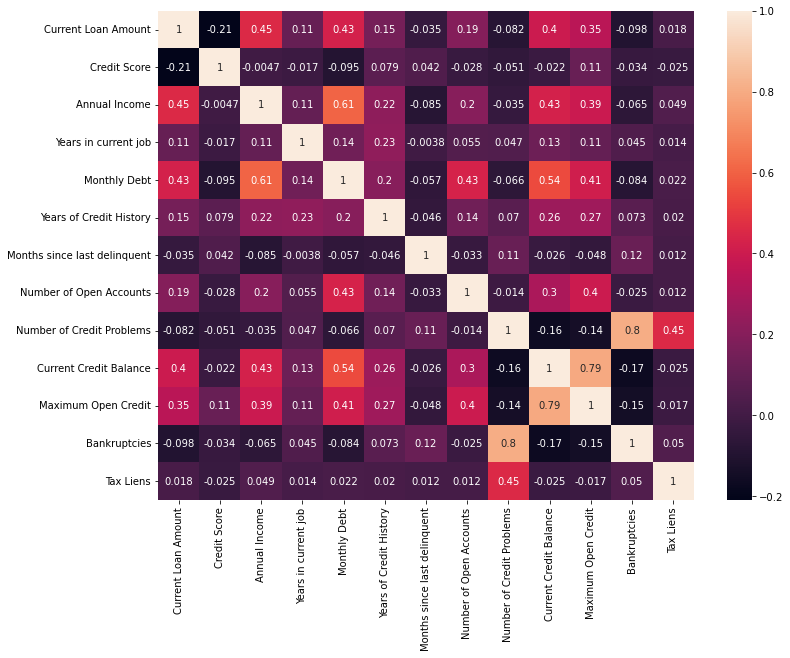

In [25]:

# df['Loan Status encoded']=np.where(df['Loan Status']=='Fully Paid',0,1)
corrMatrix = df.corr()
plt.figure(figsize = (12,9))
ax=(sns.heatmap(corrMatrix, annot=True))
plt.show()

Chi Square p value = 4.8299360525552625e-268


Loan Status  Charged Off  Fully Paid
Term                                
Long Term           8366       19426
Short Term         14273       57935

Loan Status  Charged Off  Fully Paid
Term                                
Long Term       0.301022    0.698978
Short Term      0.197665    0.802335

<AxesSubplot:xlabel='Loan Status', ylabel='Term'>

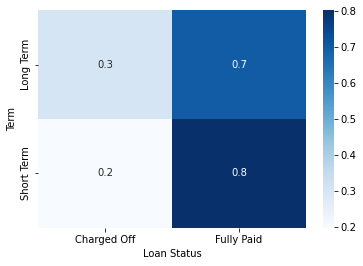

In [26]:
from scipy.stats import chisquare,chi2_contingency

v1=df['Term']
# v1=df['Purpose']
# v2=df['Home Ownership']
v2=df['Loan Status']
# g, p, dof, expctd=chi2_contingency(pd.crosstab(v1, v2))
print('Chi Square p value =' , chi2_contingency(pd.crosstab(v1, v2))[1])

display(pd.crosstab(v1, v2))
display(pd.crosstab(v1, v2,normalize='index'))
# sns.heatmap(pd.crosstab(v1, v2), annot=True)
sns.heatmap(pd.crosstab(v1, v2,normalize='index'), annot=True,cmap="Blues")


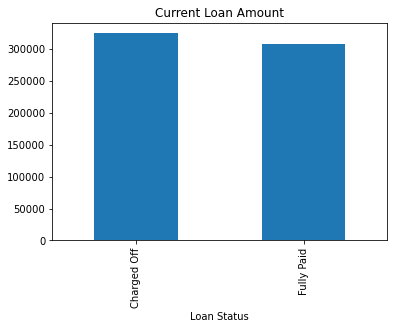

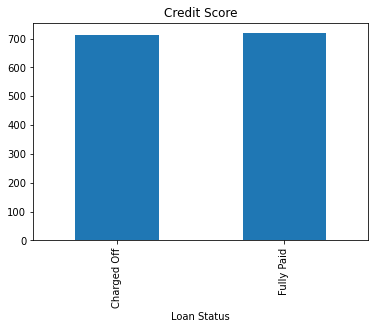

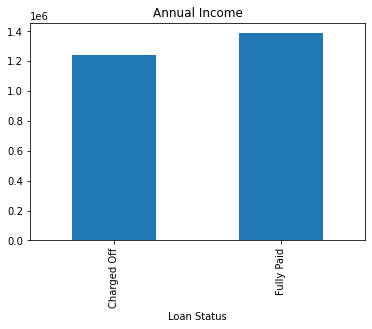

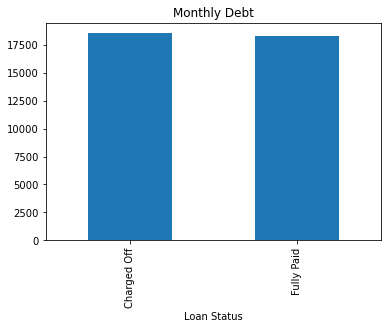

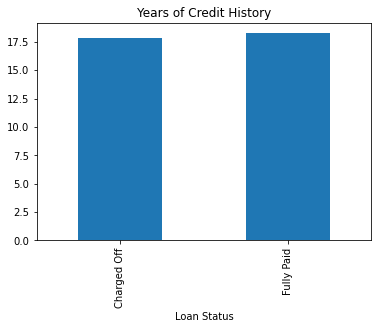

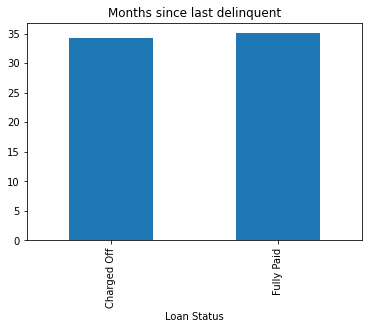

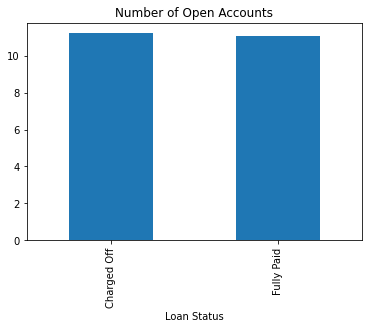

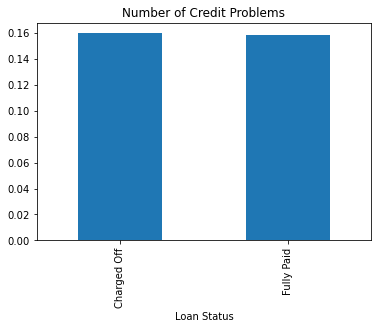

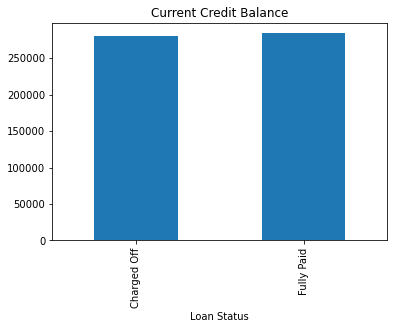

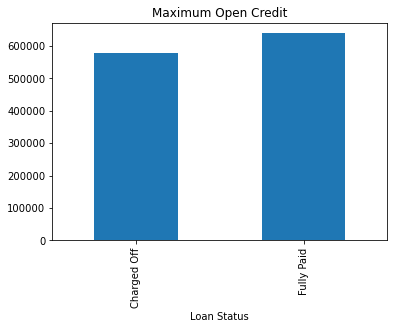

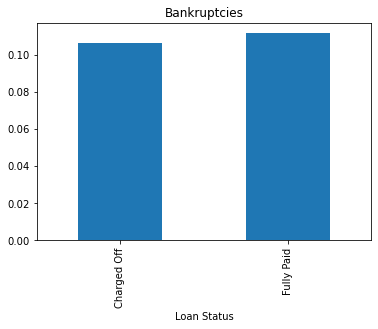

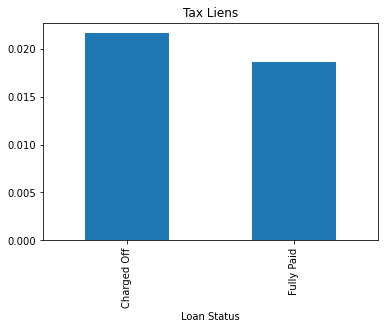

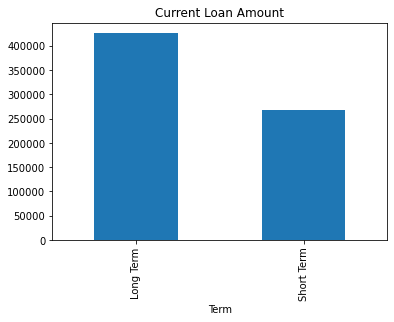

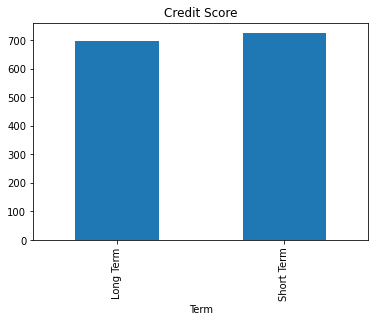

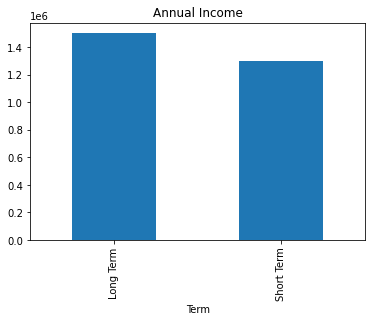

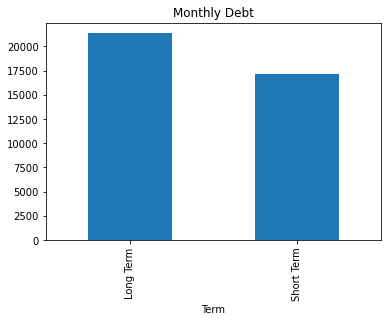

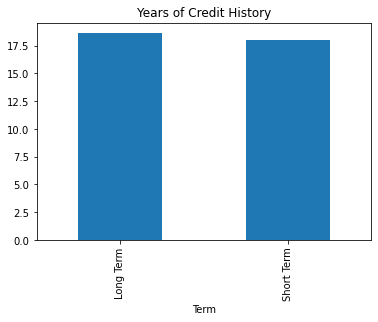

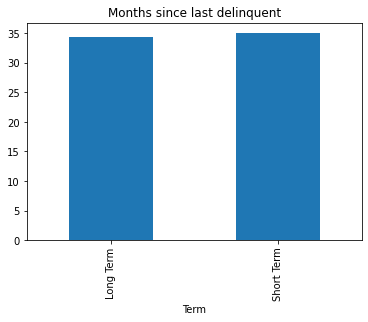

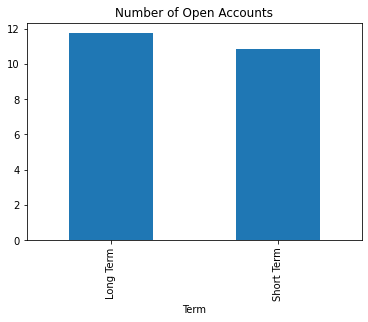

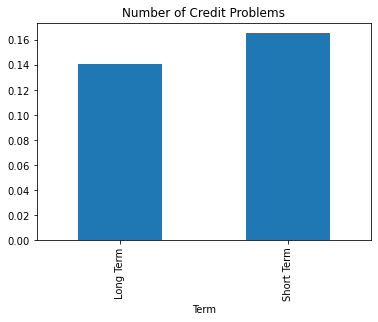

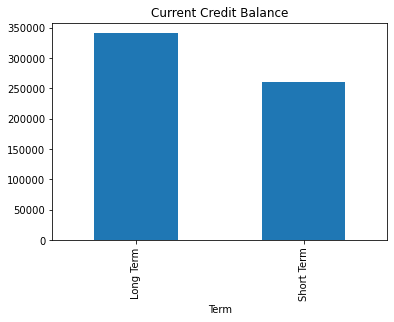

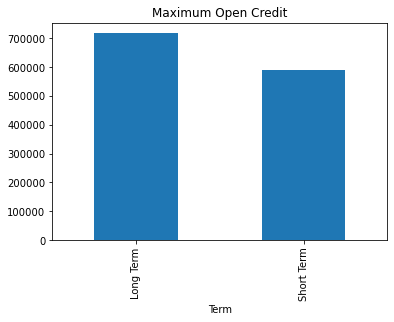

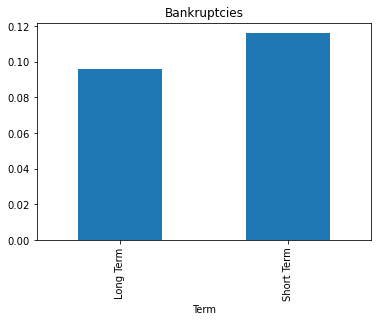

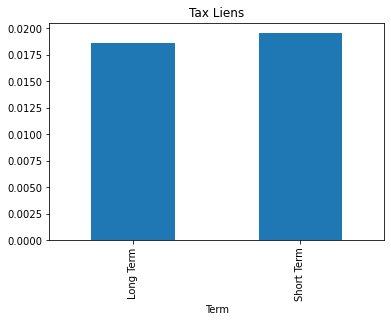

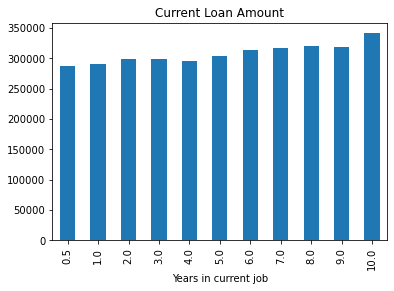

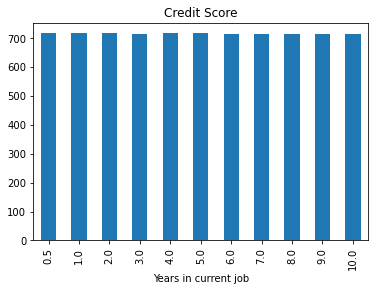

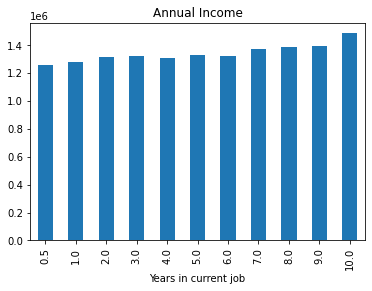

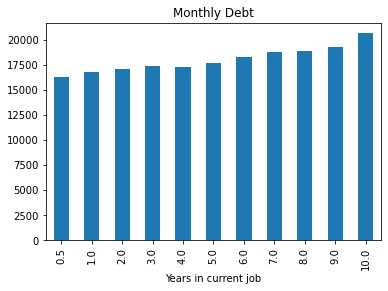

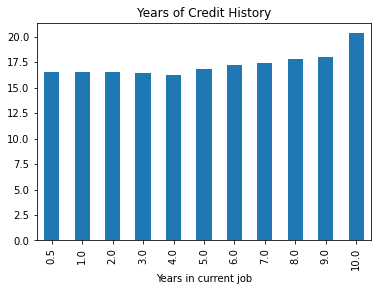

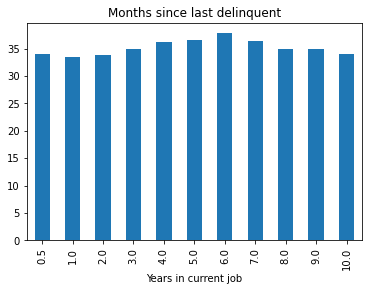

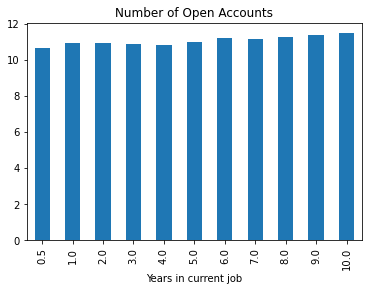

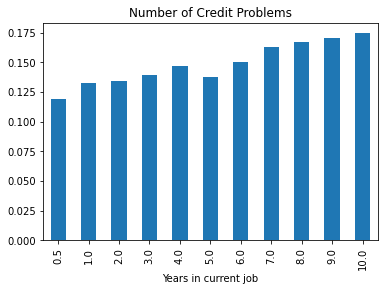

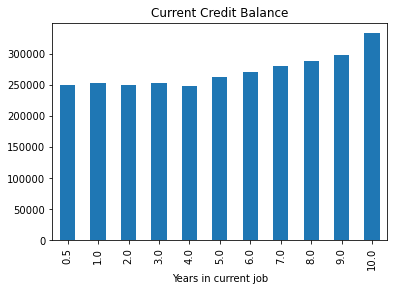

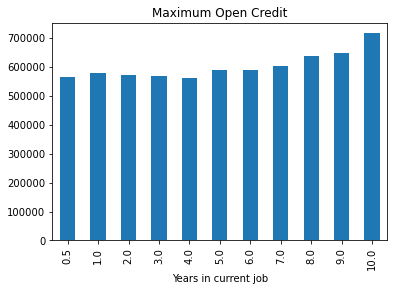

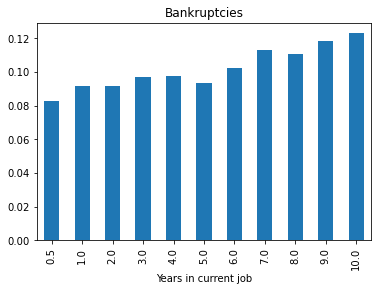

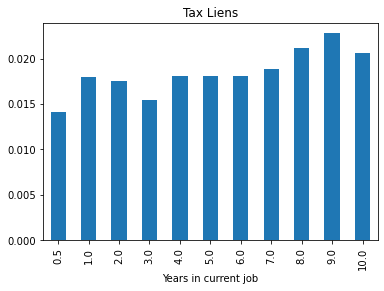

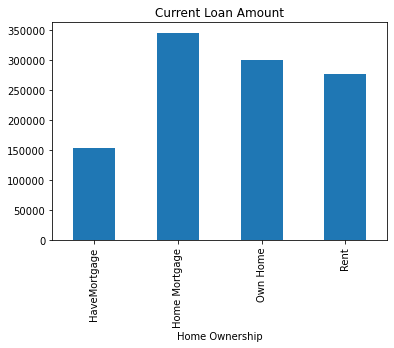

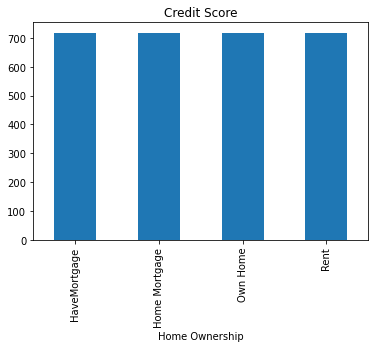

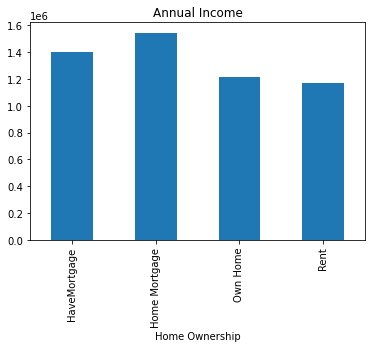

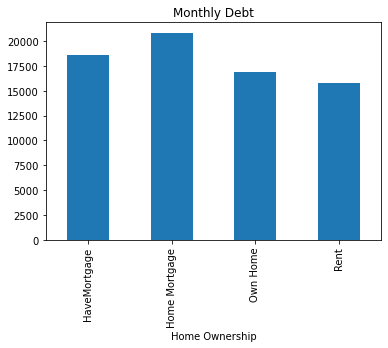

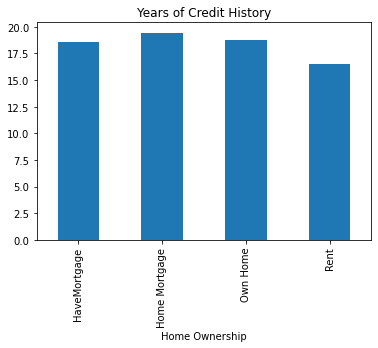

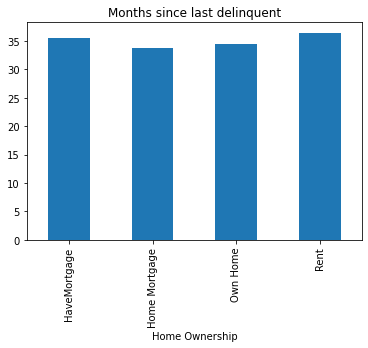

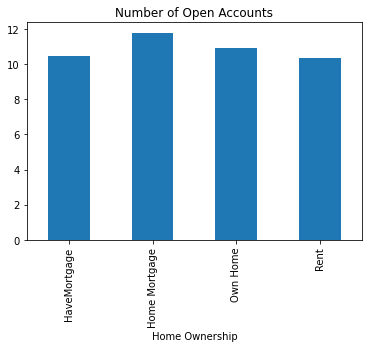

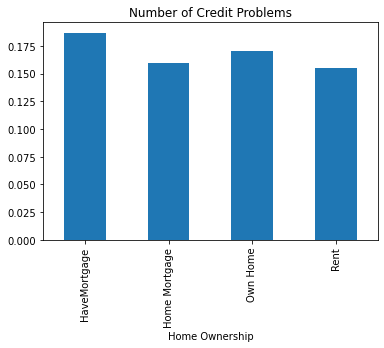

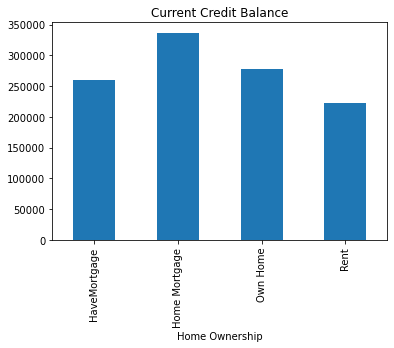

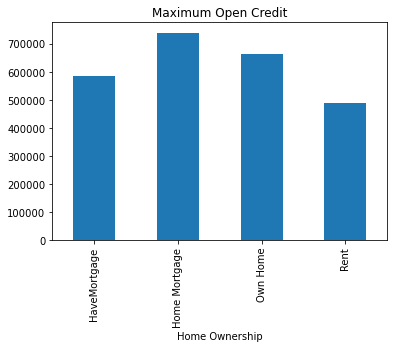

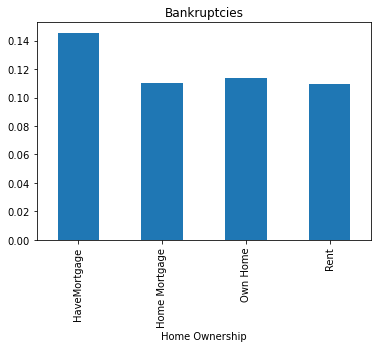

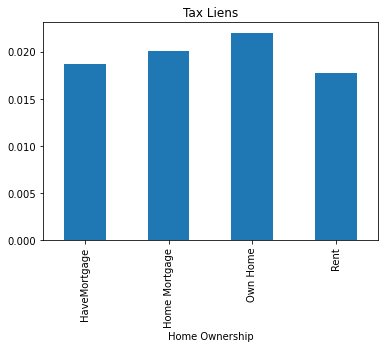

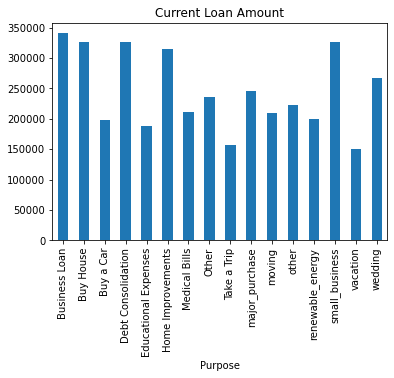

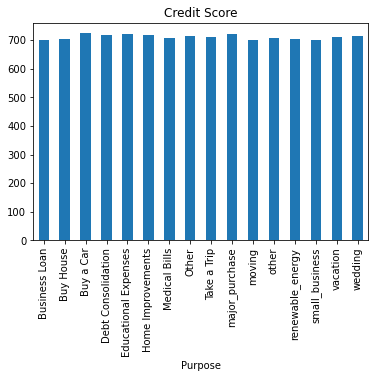

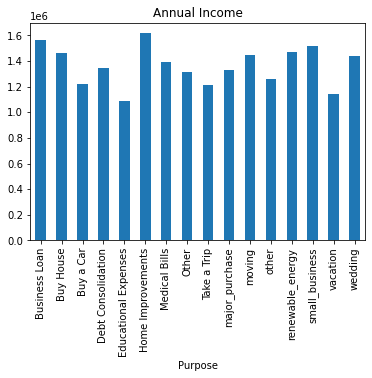

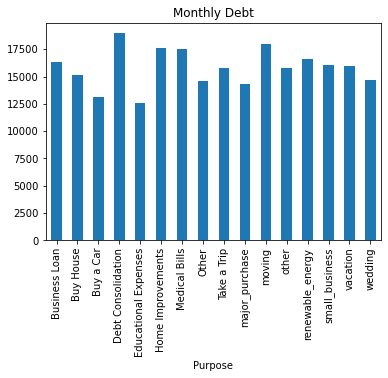

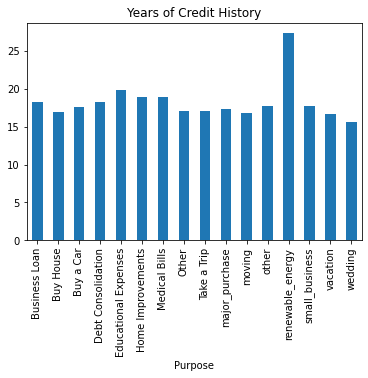

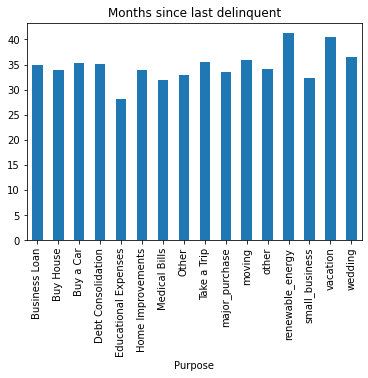

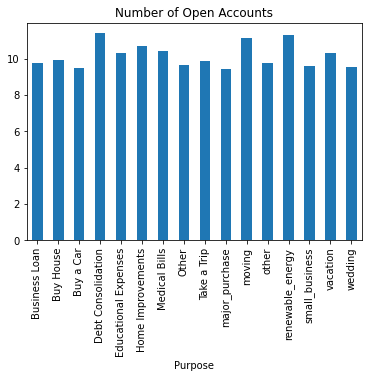

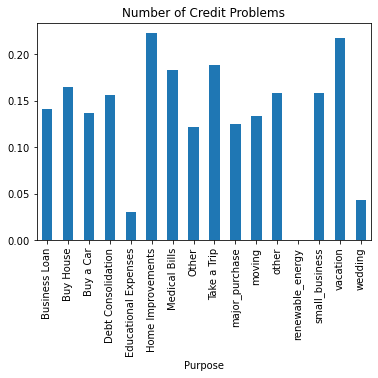

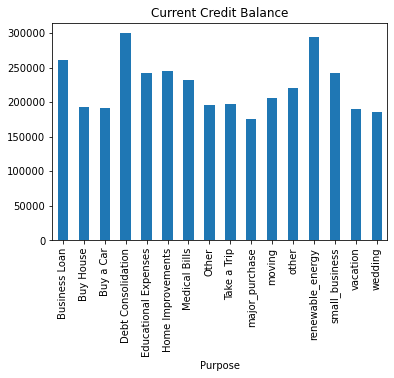

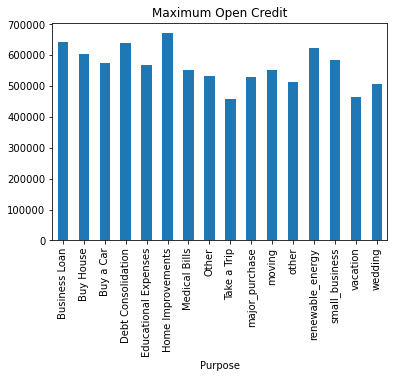

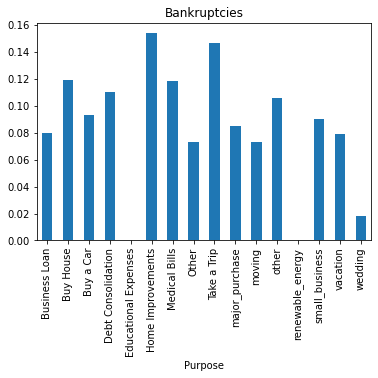

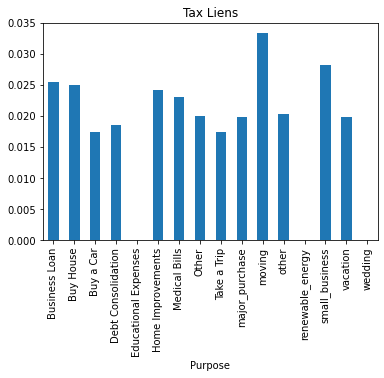

In [27]:
for cat_col in cat_cols:
    for num_col in num_cols:    
        df.groupby(cat_col)[num_col].mean().plot(kind='bar',title=num_col)
        plt.show()    


<Figure size 432x288 with 0 Axes>

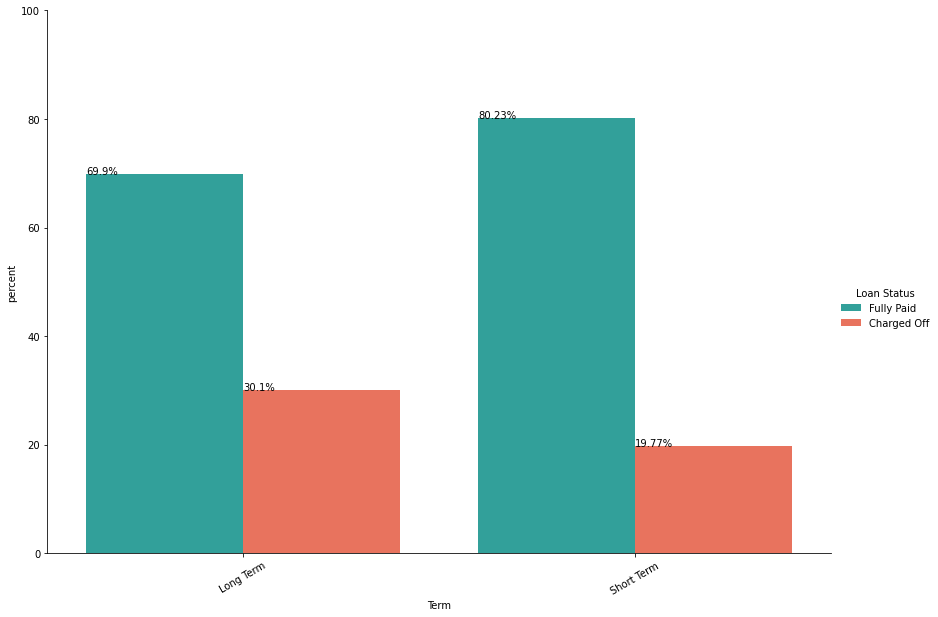

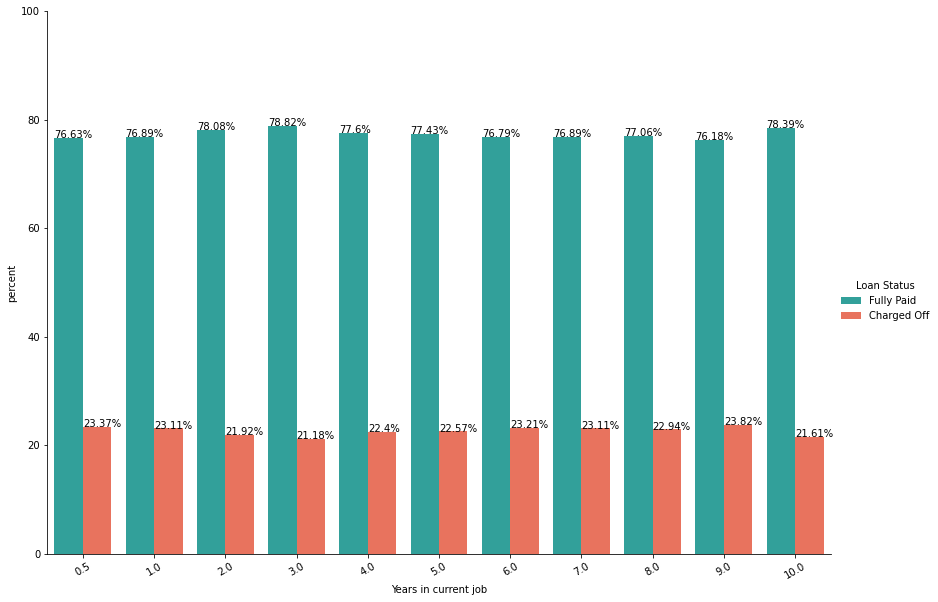

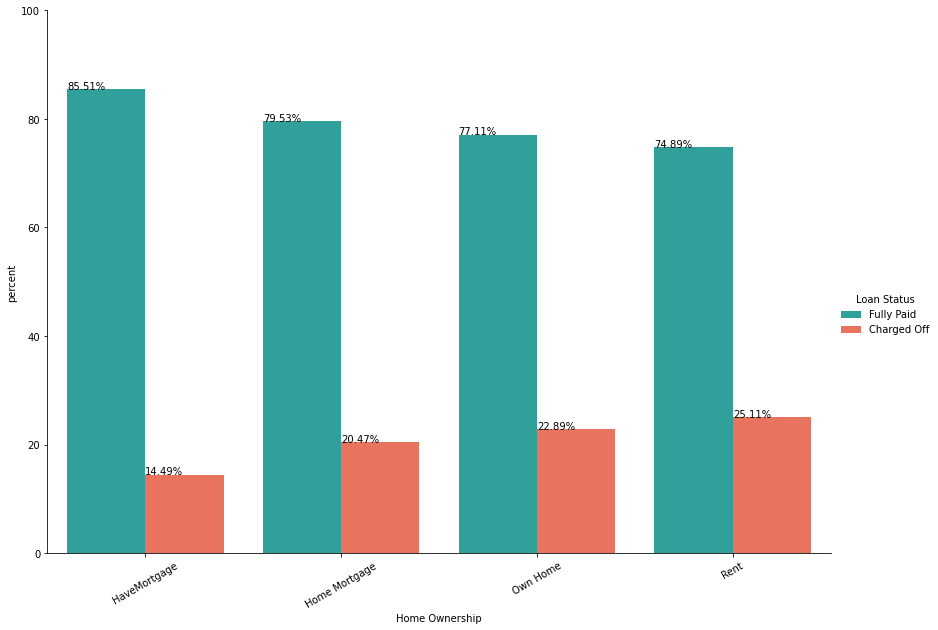

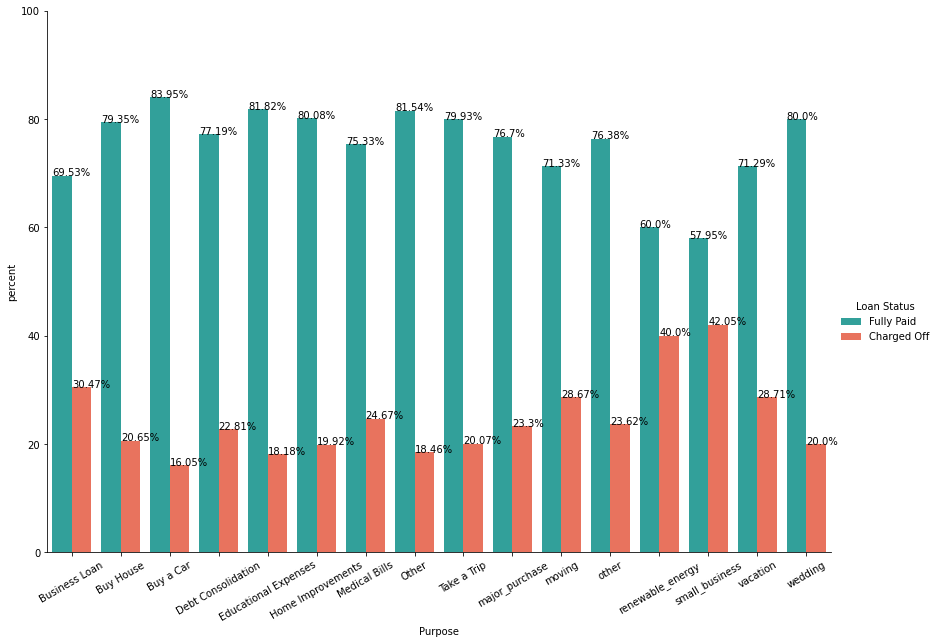

In [28]:
#Plot each attribute vs Class in percentage
y = 'Loan Status'
for i, predictor in enumerate(df[cat_cols].drop(columns=['Loan Status'])):
    plt.figure(i)
    df1 = df.groupby(predictor)[y].value_counts(normalize=True)
    df1 = df1.mul(100)
    df1 = df1.rename('percent').reset_index()

    g = sns.catplot(x=predictor,y='percent',hue=y,kind='bar',data=df1,
                    palette=sns.color_palette(['lightseagreen', 'tomato']),height=8.27, aspect=11.7/8.27)
    g.set_xticklabels(rotation=30)
    g.ax.set_ylim(0,100)

    for p in g.ax.patches:
        txt = str(np.nan_to_num(p.get_height().round(2))) + '%'
        txt_x = p.get_x() 
        txt_y = p.get_height()
        txt_y=np.nan_to_num(txt_y)
        g.ax.text(txt_x,txt_y,txt)

## Data processing and cleaning

In [29]:
df=pd.read_sql_table(r"credit_train",engine_datahub)
df.head()

Loan ID                           Customer ID  \
0  14dd8831-6af5-400b-83ec-68e61888a048  981165ec-3274-42f5-a3b4-d104041a9ca9   
1  4771cc26-131a-45db-b5aa-537ea4ba5342  2de017a3-2e01-49cb-a581-08169e83be29   
2  4eed4e6a-aa2f-4c91-8651-ce984ee8fb26  5efb2b2b-bf11-4dfd-a572-3761a2694725   
3  77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a  e777faab-98ae-45af-9a86-7ce5b33b1011   
4  d4062e70-befa-4995-8643-a0de73938182  81536ad9-5ccf-4eb8-befb-47a4d608658e   

  Loan Status  Current Loan Amount        Term  Credit Score  Annual Income  \
0  Fully Paid             445412.0  Short Term         709.0      1167493.0   
1  Fully Paid             262328.0  Short Term           NaN            NaN   
2  Fully Paid           99999999.0  Short Term         741.0      2231892.0   
3  Fully Paid             347666.0   Long Term         721.0       806949.0   
4  Fully Paid             176220.0  Short Term           NaN            NaN   

  Years in current job Home Ownership             Purpose  Monthly Debt  \
0              8 years  Home Mortgage   Home Improvements       5214.74   
1            10+ years  Home Mortgage  Debt Consolidation      33295.98   
2              8 years       Own Home  Debt Consolidation      29200.53   
3              3 years       Own Home  Debt Consolidation       8741.90   
4              5 years           Rent  Debt Consolidation      20639.70   

   Years of Credit History  Months since last delinquent  \
0                     17.2                           NaN   
1                     21.1                           8.0   
2                     14.9                          29.0   
3                     12.0                           NaN   
4                      6.1                           NaN   

   Number of Open Accounts  Number of Credit Problems  Current Credit Balance  \
0                      6.0                        1.0                228190.0   
1                     35.0                        0.0                229976.0   
2                     18.0                        1.0                297996.0   
3                      9.0                        0.0                256329.0   
4                     15.0                        0.0                253460.0   

   Maximum Open Credit  Bankruptcies  Tax Liens  
0             416746.0           1.0        0.0  
1             850784.0           0.0        0.0  
2             750090.0           0.0        0.0  
3             386958.0           0.0        0.0  
4             427174.0           0.0        0.0

In [30]:
# limitPer = len(df) * .80
# df = df.dropna(thresh=limitPer, axis=1)

# limitPer=df.shape[1] * .50
# df = df.dropna(thresh=limitPer, axis=0)

df.shape
# df.head()

df['Years in current job']=df['Years in current job'].str[:2].replace({'< ':'0.5'}).astype(float)
num_cols=df.select_dtypes('number').columns.tolist()

cat_cols=df.select_dtypes(object).drop(['Loan ID','Customer ID'],axis=1).columns.tolist()

df['Credit Score']=np.where(df['Credit Score']>=1000,df['Credit Score']/10,df['Credit Score'])
df['Current Loan Amount']=np.where(df['Current Loan Amount']==99999999,df['Current Loan Amount'].median(),df['Current Loan Amount'])

df[num_cols]=df[num_cols].clip(lower=df[num_cols].quantile(0.01), upper=df[num_cols].quantile(0.99),axis=1)

# df.query('`Loan ID`.isnull()',engine='python')
df=df.query('`Loan ID`.notnull()',engine='python')
df

Loan ID  \
0      14dd8831-6af5-400b-83ec-68e61888a048   
1      4771cc26-131a-45db-b5aa-537ea4ba5342   
2      4eed4e6a-aa2f-4c91-8651-ce984ee8fb26   
3      77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a   
4      d4062e70-befa-4995-8643-a0de73938182   
...                                     ...   
99995  3f94c18c-ba8f-45d0-8610-88a684a410a9   
99996  06eba04f-58fc-424a-b666-ed72aa008900   
99997  e1cb4050-eff5-4bdb-a1b0-aabd3f7eaac7   
99998  81ab928b-d1a5-4523-9a3c-271ebb01b4fb   
99999  c63916c6-6d46-47a9-949a-51d09af4414f   

                                Customer ID Loan Status  Current Loan Amount  \
0      981165ec-3274-42f5-a3b4-d104041a9ca9  Fully Paid             445412.0   
1      2de017a3-2e01-49cb-a581-08169e83be29  Fully Paid             262328.0   
2      5efb2b2b-bf11-4dfd-a572-3761a2694725  Fully Paid             312246.0   
3      e777faab-98ae-45af-9a86-7ce5b33b1011  Fully Paid             347666.0   
4      81536ad9-5ccf-4eb8-befb-47a4d608658e  Fully Paid             176220.0   
...                                     ...         ...                  ...   
99995  2da51983-cfef-4b8f-a733-5dfaf69e9281  Fully Paid             147070.0   
99996  77f2252a-b7d1-4b07-a746-1202a8304290  Fully Paid             312246.0   
99997  2ced5f10-bd60-4a11-9134-cadce4e7b0a3  Fully Paid             103136.0   
99998  3e45ffda-99fd-4cfc-b8b8-446f4a505f36  Fully Paid             530332.0   
99999  1b3014be-5c07-4d41-abe7-44573c375886  Fully Paid             312246.0   

             Term  Credit Score  Annual Income  Years in current job  \
0      Short Term         709.0      1167493.0                   8.0   
1      Short Term           NaN            NaN                  10.0   
2      Short Term         741.0      2231892.0                   8.0   
3       Long Term         721.0       806949.0                   3.0   
4      Short Term           NaN            NaN                   5.0   
...           ...           ...            ...                   ...   
99995  Short Term         725.0       475437.0                   7.0   
99996  Short Term         732.0      1289416.0                   1.0   
99997  Short Term         742.0      1150545.0                   6.0   
99998  Short Term         746.0      1717524.0                   9.0   
99999  Short Term         743.0       935180.0                   NaN   

      Home Ownership             Purpose  Monthly Debt  \
0      Home Mortgage   Home Improvements       5214.74   
1      Home Mortgage  Debt Consolidation      33295.98   
2           Own Home  Debt Consolidation      29200.53   
3           Own Home  Debt Consolidation       8741.90   
4               Rent  Debt Consolidation      20639.70   
...              ...                 ...           ...   
99995       Own Home               other       2202.86   
99996           Rent  Debt Consolidation      13109.05   
99997           Rent  Debt Consolidation       7315.57   
99998           Rent  Debt Consolidation       9890.07   
99999       Own Home  Debt Consolidation       9118.10   

       Years of Credit History  Months since last delinquent  \
0                         17.2                           NaN   
1                         21.1                           8.0   
2                         14.9                          29.0   
3                         12.0                           NaN   
4                          6.4                           NaN   
...                        ...                           ...   
99995                     22.3                           NaN   
99996                      9.4                          21.0   
99997                     18.8                          18.0   
99998                     15.0                           NaN   
99999                     13.0                           NaN   

       Number of Open Accounts  Number of Credit Problems  \
0                          6.0                        1.0   
1                         27.0                        0.0

In [31]:
#replace mnissing value with median, a better representation of the center of the data if it's not normally ditributed

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
for col in num_cols:
    df[col]=imputer.fit_transform(df[col].values.reshape(-1, 1))



In [32]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
for col in cat_cols:
    df[col]=imputer.fit_transform(df[col].values.reshape(-1, 1))

In [33]:
c='Purpose'
df[c].value_counts()

Debt Consolidation      78552
other                    6037
Home Improvements        5839
Other                    3250
Business Loan            1569
Buy a Car                1265
Medical Bills            1127
Buy House                 678
Take a Trip               573
major_purchase            352
small_business            283
moving                    150
wedding                   115
vacation                  101
Educational Expenses       99
renewable_energy           10
Name: Purpose, dtype: int64

In [34]:
c='Purpose'
percentage=5
dct={}
series = pd.value_counts(df[c])
mask = (series/series.sum() * 100).lt(percentage)             
dct[c] = series[mask].index.values.tolist()
dct[c]
df[c] = np.where(df[c].isin(dct[c]),'Other',df[c])
df[c].value_counts()

Debt Consolidation    78552
Other                  9572
other                  6037
Home Improvements      5839
Name: Purpose, dtype: int64

In [35]:
df.query('`Loan ID`.notnull()',engine='python')

Loan ID  \
0      14dd8831-6af5-400b-83ec-68e61888a048   
1      4771cc26-131a-45db-b5aa-537ea4ba5342   
2      4eed4e6a-aa2f-4c91-8651-ce984ee8fb26   
3      77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a   
4      d4062e70-befa-4995-8643-a0de73938182   
...                                     ...   
99995  3f94c18c-ba8f-45d0-8610-88a684a410a9   
99996  06eba04f-58fc-424a-b666-ed72aa008900   
99997  e1cb4050-eff5-4bdb-a1b0-aabd3f7eaac7   
99998  81ab928b-d1a5-4523-9a3c-271ebb01b4fb   
99999  c63916c6-6d46-47a9-949a-51d09af4414f   

                                Customer ID Loan Status  Current Loan Amount  \
0      981165ec-3274-42f5-a3b4-d104041a9ca9  Fully Paid             445412.0   
1      2de017a3-2e01-49cb-a581-08169e83be29  Fully Paid             262328.0   
2      5efb2b2b-bf11-4dfd-a572-3761a2694725  Fully Paid             312246.0   
3      e777faab-98ae-45af-9a86-7ce5b33b1011  Fully Paid             347666.0   
4      81536ad9-5ccf-4eb8-befb-47a4d608658e  Fully Paid             176220.0   
...                                     ...         ...                  ...   
99995  2da51983-cfef-4b8f-a733-5dfaf69e9281  Fully Paid             147070.0   
99996  77f2252a-b7d1-4b07-a746-1202a8304290  Fully Paid             312246.0   
99997  2ced5f10-bd60-4a11-9134-cadce4e7b0a3  Fully Paid             103136.0   
99998  3e45ffda-99fd-4cfc-b8b8-446f4a505f36  Fully Paid             530332.0   
99999  1b3014be-5c07-4d41-abe7-44573c375886  Fully Paid             312246.0   

             Term  Credit Score  Annual Income  Years in current job  \
0      Short Term         709.0      1167493.0                   8.0   
1      Short Term         722.0      1174162.0                  10.0   
2      Short Term         741.0      2231892.0                   8.0   
3       Long Term         721.0       806949.0                   3.0   
4      Short Term         722.0      1174162.0                   5.0   
...           ...           ...            ...                   ...   
99995  Short Term         725.0       475437.0                   7.0   
99996  Short Term         732.0      1289416.0                   1.0   
99997  Short Term         742.0      1150545.0                   6.0   
99998  Short Term         746.0      1717524.0                   9.0   
99999  Short Term         743.0       935180.0                   6.0   

      Home Ownership             Purpose  Monthly Debt  \
0      Home Mortgage   Home Improvements       5214.74   
1      Home Mortgage  Debt Consolidation      33295.98   
2           Own Home  Debt Consolidation      29200.53   
3           Own Home  Debt Consolidation       8741.90   
4               Rent  Debt Consolidation      20639.70   
...              ...                 ...           ...   
99995       Own Home               other       2202.86   
99996           Rent  Debt Consolidation      13109.05   
99997           Rent  Debt Consolidation       7315.57   
99998           Rent  Debt Consolidation       9890.07   
99999       Own Home  Debt Consolidation       9118.10   

       Years of Credit History  Months since last delinquent  \
0                         17.2                          32.0   
1                         21.1                           8.0   
2                         14.9                          29.0   
3                         12.0                          32.0   
4                          6.4                          32.0   
...                        ...                           ...   
99995                     22.3                          32.0   
99996                      9.4                          21.0   
99997                     18.8                          18.0   
99998                     15.0                          32.0   
99999                     13.0                          32.0   

       Number of Open Accounts  Number of Credit Problems  \
0                          6.0                        1.0   
1                         27.0                        0.0

In [36]:
#check for missing values
df[df.isnull().any(axis=1)]

Empty DataFrame
Columns: [Loan ID, Customer ID, Loan Status, Current Loan Amount, Term, Credit Score, Annual Income, Years in current job, Home Ownership, Purpose, Monthly Debt, Years of Credit History, Months since last delinquent, Number of Open Accounts, Number of Credit Problems, Current Credit Balance, Maximum Open Credit, Bankruptcies, Tax Liens]
Index: []

In [37]:
#encode the attribute
def one_hot(df, cols):
    """
    @param df pandas DataFrame
    @param cols a list of columns to encode 
    @return a DataFrame with one-hot encoding
    """
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop([each], axis=1)
    return df


cat_cols.remove('Loan Status')
df=one_hot(df,cat_cols)
df.head()

Loan ID                           Customer ID  \
0  14dd8831-6af5-400b-83ec-68e61888a048  981165ec-3274-42f5-a3b4-d104041a9ca9   
1  4771cc26-131a-45db-b5aa-537ea4ba5342  2de017a3-2e01-49cb-a581-08169e83be29   
2  4eed4e6a-aa2f-4c91-8651-ce984ee8fb26  5efb2b2b-bf11-4dfd-a572-3761a2694725   
3  77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a  e777faab-98ae-45af-9a86-7ce5b33b1011   
4  d4062e70-befa-4995-8643-a0de73938182  81536ad9-5ccf-4eb8-befb-47a4d608658e   

  Loan Status  Current Loan Amount  Credit Score  Annual Income  \
0  Fully Paid             445412.0         709.0      1167493.0   
1  Fully Paid             262328.0         722.0      1174162.0   
2  Fully Paid             312246.0         741.0      2231892.0   
3  Fully Paid             347666.0         721.0       806949.0   
4  Fully Paid             176220.0         722.0      1174162.0   

   Years in current job  Monthly Debt  Years of Credit History  \
0                   8.0       5214.74                     17.2   
1                  10.0      33295.98                     21.1   
2                   8.0      29200.53                     14.9   
3                   3.0       8741.90                     12.0   
4                   5.0      20639.70                      6.4   

   Months since last delinquent  ...  Term_Long Term  Term_Short Term  \
0                          32.0  ...               0                1   
1                           8.0  ...               0                1   
2                          29.0  ...               0                1   
3                          32.0  ...               1                0   
4                          32.0  ...               0                1   

   Home Ownership_HaveMortgage  Home Ownership_Home Mortgage  \
0                            0                             1   
1                            0                             1   
2                            0                             0   
3                            0                             0   
4                            0                             0   

   Home Ownership_Own Home  Home Ownership_Rent  Purpose_Debt Consolidation  \
0                        0                    0                           0   
1                        0                    0                           1   
2                        1                    0                           1   
3                        1                    0                           1   
4                        0                    1                           1   

   Purpose_Home Improvements  Purpose_Other  Purpose_other  
0                          1              0              0  
1                          0              0              0  
2                          0              0              0  
3                          0              0              0  
4                          0              0              0  

[5 rows x 26 columns]

In [38]:
item_list = df.columns.tolist()
item_list = [e for e in item_list if e not in ('Loan ID','Customer ID','Loan Status','Loan Status encoded')]
item_list

['Current Loan Amount',
 'Credit Score',
 'Annual Income',
 'Years in current job',
 'Monthly Debt',
 'Years of Credit History',
 'Months since last delinquent',
 'Number of Open Accounts',
 'Number of Credit Problems',
 'Current Credit Balance',
 'Maximum Open Credit',
 'Bankruptcies',
 'Tax Liens',
 'Term_Long Term',
 'Term_Short Term',
 'Home Ownership_HaveMortgage',
 'Home Ownership_Home Mortgage',
 'Home Ownership_Own Home',
 'Home Ownership_Rent',
 'Purpose_Debt Consolidation',
 'Purpose_Home Improvements',
 'Purpose_Other',
 'Purpose_other']

# Optional start --------------------------------------------

# Checking for multicollinearity using VIF(Variance Inflation Factor)

A variance inflation factor (VIF) is a measure of the amount of multicollinearity in regression analysis. Multicollinearity exists when there is a correlation between multiple independent variables in a multiple regression model. This can adversely affect the regression results. The higher the value, the greater the correlation of the variable with other variables. Values of more than 4 or 5 are sometimes regarded as being moderate to high, with values of 10 or more being regarded as very high.

In [39]:

def vif_cal(input_data, dependent_col):
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

import statsmodels.formula.api as sm
vif_cal(df[item_list+['Loan Status']],'Loan Status')      

Current Loan Amount  VIF =  1.63
Credit Score  VIF =  1.34
Annual Income  VIF =  1.6
Years in current job  VIF =  1.1
Monthly Debt  VIF =  2.1
Years of Credit History  VIF =  1.18
Months since last delinquent  VIF =  1.01
Number of Open Accounts  VIF =  1.4
Number of Credit Problems  VIF =  5.39
Current Credit Balance  VIF =  3.47
Maximum Open Credit  VIF =  3.27
Bankruptcies  VIF =  4.28
Tax Liens  VIF =  1.92


C:\Users\bdaon\AppData\Local\Temp/ipykernel_17852/4249153230.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)


Term_Long Term  VIF =  inf
Term_Short Term  VIF =  inf
Home Ownership_HaveMortgage  VIF =  inf
Home Ownership_Home Mortgage  VIF =  inf
Home Ownership_Own Home  VIF =  inf
Home Ownership_Rent  VIF =  inf
Purpose_Debt Consolidation  VIF =  inf
Purpose_Home Improvements  VIF =  inf
Purpose_Other  VIF =  inf
Purpose_other  VIF =  inf


# Feature selection

In [40]:
y =df['Loan Status'].map({'Fully Paid':0,'Charged Off':1})# target variable
X= df[item_list]# features after dropping the  target (diagnosis) & ID
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### KBest

In [41]:
from sklearn.feature_selection import SelectKBest, chi2
X_5_best= SelectKBest(chi2, k=15).fit(x_train, y_train)
mask = X_5_best.get_support() #list of booleans for selected features
new_feat = [] 
for bool, feature in zip(mask, x_train.columns):
    if bool:
        new_feat.append(feature)
print('The best features are:{}'.format(new_feat)) # The list of your 5 best features

The best features are:['Current Loan Amount', 'Credit Score', 'Annual Income', 'Years in current job', 'Monthly Debt', 'Years of Credit History', 'Months since last delinquent', 'Number of Open Accounts', 'Current Credit Balance', 'Maximum Open Credit', 'Term_Long Term', 'Term_Short Term', 'Home Ownership_Home Mortgage', 'Home Ownership_Rent', 'Purpose_Home Improvements']


### RFECV

In [42]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.feature_selection import RFECV
# cv_estimator = RandomForestClassifier(random_state =42)
# cv_estimator.fit(X_train, Y_train)
# cv_selector = RFECV(cv_estimator,cv= 5, step=1,scoring='accuracy')
# cv_selector = cv_selector.fit(X_train, Y_train)
# rfecv_mask = cv_selector.get_support() #list of booleans
# rfecv_features = [] 
# for bool, feature in zip(rfecv_mask, X_train.columns):
#     if bool:
#         rfecv_features.append(feature)
# print('Optimal number of features :', cv_selector.n_features_)
# print('Best features :', rfecv_features)


In [43]:

# n_features = x_train.shape[1]
# plt.figure(figsize=(8,8))
# plt.barh(range(n_features), cv_estimator.feature_importances_, align='center') 
# plt.yticks(np.arange(n_features), x_train.columns.values) 
# plt.xlabel('Feature importance')
# plt.ylabel('Feature')
# plt.show()

## Algorithm selection
Sometimes it's difficult to know which algorithm to use to train the model because each algorithm has its pros and cons so we test mainstream algorithms and pick the one with the best 
performance.

LR: 0.618500 (0.004904)
LDA: 0.617122 (0.004269)
KNN: 0.571874 (0.004631)
CART: 0.574802 (0.006849)
NB: 0.597217 (0.006075)


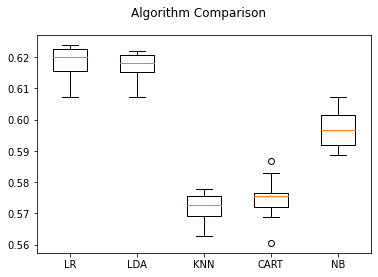

In [44]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_x =pd.DataFrame(scaler.fit_transform(df[item_list]),columns=item_list)
                   
df['Loan Status encoded']=np.where(df['Loan Status']=='Fully Paid',0,1)                   
                   
# load dataset
x_train, x_test, y_train, y_test = train_test_split(df_x, df['Loan Status encoded'], 
                                                    test_size = .25)

X = x_train
Y = y_train

# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
# models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'roc_auc'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Select the best algorithm and do Grid Search for the best Hyper Parameters.
From the above boxplot we can see that the attributes are very powerful predictors and all algorithms have high performance.
In this case we choose Logistic Regression due to it's better interpretability. To further improve the performance we do Grid Search
to find the best Hyper Parameters for Logistic Regression

In [45]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=5)
logreg_cv.fit(x_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'penalty': 'l2'}
accuracy : 0.7741866666666667


# Optional end --------------------------------------------

In [46]:
df

Loan ID  \
0      14dd8831-6af5-400b-83ec-68e61888a048   
1      4771cc26-131a-45db-b5aa-537ea4ba5342   
2      4eed4e6a-aa2f-4c91-8651-ce984ee8fb26   
3      77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a   
4      d4062e70-befa-4995-8643-a0de73938182   
...                                     ...   
99995  3f94c18c-ba8f-45d0-8610-88a684a410a9   
99996  06eba04f-58fc-424a-b666-ed72aa008900   
99997  e1cb4050-eff5-4bdb-a1b0-aabd3f7eaac7   
99998  81ab928b-d1a5-4523-9a3c-271ebb01b4fb   
99999  c63916c6-6d46-47a9-949a-51d09af4414f   

                                Customer ID Loan Status  Current Loan Amount  \
0      981165ec-3274-42f5-a3b4-d104041a9ca9  Fully Paid             445412.0   
1      2de017a3-2e01-49cb-a581-08169e83be29  Fully Paid             262328.0   
2      5efb2b2b-bf11-4dfd-a572-3761a2694725  Fully Paid             312246.0   
3      e777faab-98ae-45af-9a86-7ce5b33b1011  Fully Paid             347666.0   
4      81536ad9-5ccf-4eb8-befb-47a4d608658e  Fully Paid             176220.0   
...                                     ...         ...                  ...   
99995  2da51983-cfef-4b8f-a733-5dfaf69e9281  Fully Paid             147070.0   
99996  77f2252a-b7d1-4b07-a746-1202a8304290  Fully Paid             312246.0   
99997  2ced5f10-bd60-4a11-9134-cadce4e7b0a3  Fully Paid             103136.0   
99998  3e45ffda-99fd-4cfc-b8b8-446f4a505f36  Fully Paid             530332.0   
99999  1b3014be-5c07-4d41-abe7-44573c375886  Fully Paid             312246.0   

       Credit Score  Annual Income  Years in current job  Monthly Debt  \
0             709.0      1167493.0                   8.0       5214.74   
1             722.0      1174162.0                  10.0      33295.98   
2             741.0      2231892.0                   8.0      29200.53   
3             721.0       806949.0                   3.0       8741.90   
4             722.0      1174162.0                   5.0      20639.70   
...             ...            ...                   ...           ...   
99995         725.0       475437.0                   7.0       2202.86   
99996         732.0      1289416.0                   1.0      13109.05   
99997         742.0      1150545.0                   6.0       7315.57   
99998         746.0      1717524.0                   9.0       9890.07   
99999         743.0       935180.0                   6.0       9118.10   

       Years of Credit History  Months since last delinquent  ...  \
0                         17.2                          32.0  ...   
1                         21.1                           8.0  ...   
2                         14.9                          29.0  ...   
3                         12.0                          32.0  ...   
4                          6.4                          32.0  ...   
...                        ...                           ...  ...   
99995                     22.3                          32.0  ...   
99996                      9.4                          21.0  ...   
99997                     18.8                          18.0  ...   
99998                     15.0                          32.0  ...   
99999                     13.0                          32.0  ...   

       Term_Short Term  Home Ownership_HaveMortgage  \
0                    1                            0   
1                    1                            0   
2                    1                            0   
3                    0                            0   
4                    1                            0   
...                ...                          ...   
99995                1                            0   
99996                1                            0   
99997                1                            0   
99998                1                            0   
99999                1                            0   

       Home Ownership_Home Mortgage  Home Ownership_Own Home  \
0                                 1                        0   
1  

In [47]:
#For better performance use MinMaxScaler to scale and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_x =pd.DataFrame(scaler.fit_transform(df[item_list]),columns=item_list)

In [48]:
df_x

Current Loan Amount  Credit Score  Annual Income  Years in current job  \
0                 0.550340      0.682171       0.193733              0.789474   
1                 0.303111      0.782946       0.195305              1.000000   
2                 0.370518      0.930233       0.444709              0.789474   
3                 0.418348      0.775194       0.108720              0.263158   
4                 0.186834      0.782946       0.195305              0.473684   
...                    ...           ...            ...                   ...   
99995             0.147471      0.806202       0.030552              0.684211   
99996             0.370518      0.860465       0.222481              0.052632   
99997             0.088144      0.937984       0.189737              0.578947   
99998             0.665013      0.968992       0.323425              0.894737   
99999             0.370518      0.945736       0.138956              0.578947   

       Monthly Debt  Years of Credit History  Months since last delinquent  \
0          0.068965                 0.320475                        0.3875   
1          0.557406                 0.436202                        0.0875   
2          0.486171                 0.252226                        0.3500   
3          0.130316                 0.166172                        0.3875   
4          0.337265                 0.000000                        0.3875   
...             ...                      ...                           ...   
99995      0.016577                 0.471810                        0.3875   
99996      0.206278                 0.089021                        0.2500   
99997      0.105507                 0.367953                        0.2125   
99998      0.150287                 0.255193                        0.3875   
99999      0.136860                 0.195846                        0.3875   

       Number of Open Accounts  Number of Credit Problems  \
0                     0.125000                        0.5   
1                     1.000000                        0.0   
2                     0.625000                        0.5   
3                     0.250000                        0.0   
4                     0.500000                        0.0   
...                        ...                        ...   
99995                 0.083333                        0.0   
99996                 0.791667                        0.0   
99997                 0.375000                        0.5   
99998                 0.208333                        0.0   
99999                 0.041667                        0.5   

       Current Credit Balance  ...  Term_Long Term  Term_Short Term  \
0                    0.145416  ...             0.0              1.0   
1                    0.146568  ...             0.0              1.0   
2                    0.190459  ...             0.0              1.0   
3                    0.163573  ...             1.0              0.0   
4                    0.161722  ...             0.0              1.0   
...                       ...  ...             ...              ...   
99995                0.028995  ...             0.0              1.0   
99996                0.096928  ...             0.0              1.0   
99997                0.068864  ...             0.0              1.0   
99998                0.259005  ...             0.0              1.0   
99999                0.027597  ...             0.0              1.0   

       Home Ownership_HaveMortgage  Home Ownership_Home Mortgage  \
0                              0.0                           1.0   
1                              0.0                           1.0   
2                              0.0                           0.0   
3                              0.0                           0.0   
4                              0.0                           0.0   
...                            ...                           ...   
99995                          0.0 

In [49]:
df_y=np.where(df['Loan Status']=='Fully Paid',0,1)   

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve, average_precision_score


                   
#splitting the principal training dataset to subtrain and subtest datasets
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = .3)

from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()

logit.fit(x_train, y_train)
predictions = logit.predict(x_test)
probabilities = logit.predict_proba(x_test)
    
print('Algorithm:', type(logit).__name__)
print("\nClassification report:\n", classification_report(y_test, predictions))
print("Accuracy Score:", accuracy_score(y_test, predictions))

Algorithm: LogisticRegression

Classification report:
               precision    recall  f1-score   support

           0       0.77      1.00      0.87     23214
           1       0.29      0.00      0.00      6786

    accuracy                           0.77     30000
   macro avg       0.53      0.50      0.44     30000
weighted avg       0.66      0.77      0.68     30000

Accuracy Score: 0.7737


In [51]:
#confusion matrix
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.offline as py
conf_matrix = confusion_matrix(y_test, predictions)

trace=go.Heatmap(z = conf_matrix,x = ["0", "1"],y = ["0", "1"],showscale = False, colorscale = "Picnic")
fig = make_subplots()
fig.add_trace(trace)
py.iplot(fig)

In [52]:
column_df = pd.DataFrame(x_train.columns.tolist())
coefficients = pd.DataFrame(logit.coef_.ravel())
coef_sumry = (pd.merge(coefficients, column_df, left_index=True, 
                               right_index=True, how="left"))
coef_sumry.columns = ["coefficients", "features"]
coef_sumry = coef_sumry.sort_values(by = "coefficients", ascending=False)
display(coef_sumry)
trace = go.Bar(x = coef_sumry["features"], y = coef_sumry["coefficients"])


fig = make_subplots()
fig.add_trace(trace)
py.iplot(fig)

coefficients                      features
9       1.125615        Current Credit Balance
4       0.566776                  Monthly Debt
0       0.453077           Current Loan Amount
7       0.366714       Number of Open Accounts
8       0.203992     Number of Credit Problems
12      0.126246                     Tax Liens
18      0.097131           Home Ownership_Rent
13      0.051885                Term_Long Term
3      -0.007519          Years in current job
17     -0.017195       Home Ownership_Own Home
22     -0.049602                 Purpose_other
5      -0.073175       Years of Credit History
21     -0.079358                 Purpose_Other
20     -0.096687     Purpose_Home Improvements
6      -0.149904  Months since last delinquent
16     -0.154794  Home Ownership_Home Mortgage
11     -0.166911                  Bankruptcies
19     -0.168229    Purpose_Debt Consolidation
1      -0.224152                  Credit Score
15     -0.319017   Home Ownership_HaveMortgage
14     -0.445760               Term_Short Term
10     -1.835487           Maximum Open Credit
2      -2.000770                 Annual Income

### Interpret the results:
<!-- An Accuracy Score of 0.96 on Test data is a very good score with 1 being perfect 100% correct prediction. 
From the confusion Matrix we know that out of 194 predictions, only 7 mistake. Area under curve(True Positive/ False Positive), 
another model performance metric which often is used for unbalanced samples, is 0.965, also near perfect. 
The Feature Importance chart  suggests that  Money_Values, PARA_B, PARA_A, Score and District_Loss are more powerful predictors for Risk. 
 -->
<!-- Overall we have a very good model that can predict Risk. -->

# Productization of your Insights/Recommendations

In [53]:
df=pd.read_sql_table(r"credit_test",engine_datahub)
df.head()


# limitPer = len(df) * .80
# df = df.dropna(thresh=limitPer, axis=1)

# limitPer=df.shape[1] * .50
# df = df.dropna(thresh=limitPer, axis=0)

df.shape

df['Years in current job']=df['Years in current job'].str[:2].replace({'< ':'0.5'}).astype(float)
num_cols=df.select_dtypes('number').columns.tolist()

cat_cols=df.select_dtypes(object).drop(['Loan ID','Customer ID'],axis=1).columns.tolist()

df['Credit Score']=np.where(df['Credit Score']>=1000,df['Credit Score']/10,df['Credit Score'])
df['Current Loan Amount']=np.where(df['Current Loan Amount']==99999999,df['Current Loan Amount'].median(),df['Current Loan Amount'])

df[num_cols]=df[num_cols].clip(lower=df[num_cols].quantile(0.01), upper=df[num_cols].quantile(0.99),axis=1)

# df.query('`Loan ID`.isnull()',engine='python')
df=df.query('`Loan ID`.notnull()',engine='python')

#replace mnissing value with median, a better representation of the center of the data if it's not normally ditributed

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
for col in num_cols:
    df[col]=imputer.fit_transform(df[col].values.reshape(-1, 1))



imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
for col in cat_cols:
    df[col]=imputer.fit_transform(df[col].values.reshape(-1, 1))

c='Purpose'
percentage=5
dct={}
series = pd.value_counts(df[c])
mask = (series/series.sum() * 100).lt(percentage)             
dct[c] = series[mask].index.values.tolist()
dct[c]
df[c] = np.where(df[c].isin(dct[c]),'Other',df[c])
df[c].value_counts()

unique_counts = pd.DataFrame.from_records([(col, df[col].nunique()) for col in df.columns],
                          columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])

#encode the attribute
def one_hot(df, cols):
    """
    @param df pandas DataFrame
    @param cols a list of columns to encode 
    @return a DataFrame with one-hot encoding
    """
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop([each], axis=1)
    return df


# cat_cols.remove('Loan Status')
df=one_hot(df,cat_cols)
df.head()

item_list = df.columns.tolist()
item_list = [e for e in item_list if e not in ('Loan ID','Customer ID','Loan Status','Loan Status encoded')]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_x =pd.DataFrame(scaler.fit_transform(df[item_list]),columns=item_list)
                   


In [54]:
df['probabily'] = logit.predict_proba(df_x)[:,1]
df.sort_values(by='probabily',ascending=False).head(50)


Loan ID  \
8967  df7a201e-1764-439c-b439-59bf6cf12692   
5870  3df6ff34-a3b4-49f4-a72a-e23fc77f4072   
944   2d1b843b-2b90-4a99-94b5-29acf09af541   
7594  ad3db3ca-9ea5-4b14-8e57-89bc7c5d4b70   
8267  08ba9751-937f-4a67-bf0e-7b754138c996   
2266  3648867b-6357-4fef-9c02-c59df505197e   
3691  88c852ee-2713-418b-8440-b111c4f32878   
9273  43f7a3a2-bdd3-4d6b-a31c-13f754277831   
350   4ceaf239-8680-45a4-9b95-f4ed2e717cc7   
5346  86d9480d-c9d2-4d47-a535-9a0c8414dd89   
7671  b339455b-c481-45f6-be97-032783f2417f   
343   6f57ec66-e98e-4b87-9430-6da1ceefb465   
3915  a95880a8-830a-4e37-bfcd-5049f0419ec0   
2085  b8ae42e6-beaf-4b9a-8d39-12e164caee92   
3064  af82235b-4c88-4477-986b-a3fb31d26db0   
4361  8723d3d5-1ab7-45e4-9b7d-19b9e0a0717e   
580   75205da7-77af-43b9-baf4-4597d942f476   
2319  32cb1822-a954-4b60-a15f-159e1643e7ee   
2459  1bb6b43a-752b-4a53-8b28-64e31473f0fb   
6385  417275b9-3c1f-4e89-b557-107c96b77e41   
9500  52272e4e-9223-404e-bb8c-74a42b4d8e76   
9197  3746439d-e79a-4401-8a69-40b7fd133194   
5888  4d7a0d55-7ecb-4caa-8ed9-9312f4e9a9c1   
6446  096e135c-5744-45ee-920d-2af064895a29   
4258  17ab35d1-47e7-4100-863e-f827706d90ff   
9085  3e17be9e-0ffc-47cf-8212-f31400181b2c   
6605  e1f347dd-7237-4e77-87a8-08d97cc89051   
3959  d7a72080-6bec-4028-a15a-f3942484c0e6   
6507  d878fb23-4144-4c53-9bfa-f85bb751913d   
3247  6949ab71-5872-4ebd-90c8-9b97f7112c61   
2057  ebfd694c-c1d2-42a8-8404-6cb6c38273dc   
3532  eab48af7-1684-41e7-b085-2b1e8e2f21e7   
9923  b3af96c5-9d2d-4730-ad50-b3ce1465d565   
8492  9919549d-979f-4169-a0d8-80fed1bbed5a   
7833  1e058573-7e98-4eb3-8568-92f2a06e1738   
5505  7e3ae261-cc24-43b5-830a-59401d255ca5   
7094  b76451d1-9a9a-4c03-89e2-13788a7c6fbb   
4868  f8848372-c895-4f86-b7a0-5ea0f945ae6f   
8778  581df1b1-89ca-4b6f-a47a-52d8166714c0   
4403  73a326cb-968e-4e77-b352-dce4ee112c1e   
5248  b6ef3643-d6aa-452a-89bf-cbd3199186a8   
8043  44cd6e1d-b9fe-476f-ab6b-4043b8316ab5   
295   21cba266-0f92-4708-a59d-1e044c320b74   
3671  7207d79d-ca9e-4665-889b-c517aa6424ae   
834   cc3bea33-6f75-443b-8b39-2a106bf64943   
5993  ca217bc9-86e3-4aa3-8ff9-1b28bd908933   
2913  2fcc52ee-e8f1-463b-a7a5-4af97c2596a9   
9021  37cf46a1-c88e-49c3-add8-285a48d8acbc   
3744  7f79f035-b03c-437a-893c-69a135310aae   
3176  8d84dd7d-e8b9-439c-9214-254820cf3b89   

                               Customer ID  Current Loan Amount  Credit Score  \
8967  4b61d79f-c779-46e2-b0a7-8e7f058fcc88             759924.0         723.0   
5870  ffffc64c-8637-4a08-b2e7-5b67bd8da124             591888.0         633.0   
944   509274f0-b7a0-4d52-a3c6-d0c227ca8c35             669768.0         723.0   
7594  d396b3ae-f4b4-4270-8cb4-d45622a36348             543334.0         646.0   
8267  3567cc33-1a1e-4fae-8cf6-a3502f9da941             776473.5         723.0   
2266  fa00a69b-1190-4932-b01b-83b958c19cb9             242660.0         667.0   
3691  33a25d99-55cb-49a6-a5ba-cbbb2b7f40fb             755678.0         723.0   
9273  f6a12de7-4d24-484c-be08-e63a40e6825c             768768.0         723.0   
350   b735beb0-0c84-47d4-981f-9bfb69d1c319             545710.0         640.0   
5346  70b2e49b-6c44-4ac7-a121-4569f1177d46             762762.0         723.0   
7671  72f5ac23-1972-4764-abb0-541f2eadb3f3             490446.0         675.0   
343   660e81c9-180a-4300-9206-c8be6e403127             763532.0         649.0   
3915  61b63827-bb60-42c0-baf9-25a162dc2a6f             299948.0         652.0   
2085  4b88bac0-d0a2-4252-952c-c0be676ebaa1             655248.0         662.0   
3064  303bf7a4-5ca4-41b3-aa68-ceef973b4479             447568.0         686.0   
4361  9c5b1555-ee40-4e19-92ac-39ec4ca4aec5             424644.0         635.0   
580   bc7ec99c-1510-435b-95fa-41d3cae14594             750728.0         723.0   
2319  ddd0daf4-f9a2-4e98-b8dd-324aa01ac066             218988.0         704.0   
2459  936cef1f-9434-40c2-9314-1076a5532f6e             309276.0         637.0   
6385  f816a0f9-6630-4d46-8d21-7b6c1ff3b865             307846.0     

In [55]:
import pyodbc
import urllib
import sqlalchemy

'''connect to datahub'''

params_datahub = urllib.parse.quote_plus("DRIVER={SQL Server Native Client 11.0};"
                                 "SERVER=localhost\SQLEXPRESS;"
                                 "DATABASE=datahub;"
                                 "UID=sa;"
                                 "PWD=user1")

engine_datahub = sqlalchemy.create_engine("mssql+pyodbc:///?odbc_connect={}".format(params_datahub))
df=df.drop('Purpose_other',axis=1)
df.to_sql('credit_prediction', engine_datahub,if_exists='replace',)